

# **Predicting Airline Customer Satisfaction**
## Phase 2: Predictive Modelling


<center> Names & IDs of group members </center> 

Names  | IDs
------------- | -------------
Matthew Bentham  | S3923076
John Murrowood  | S3923075
Isxaq Warsame  |  S3658179

__________

### Table of contents:
- [Introduction](#intro)
   - [Phase 1 Summary](#ps)
   - [Report Overview](#ro)
   - [Overview of Methodology](#oom)
- [Predictive Modelling](#pm)
  - [Data Preperation](#fs)
    - [One-Hot-Encoding & Integer-Encoding](#ohe)
    - [Scaling](#s)
  - [Feature Selection](#fs)
  - [Model Fitting & Tuning](#mft)
  - [Neural Network Model Fitting & Tuning](#nnmft)
  - [Model Comparison](#mc)
- [Critique & Limitation](#cl)
- [Summary & Conclusions](#sc)
  - [Project Summary](#ps)
  - [Summary & Findings](#sf)
  - [Conclusion](#c)



# INTRODUCTION <a name="intro"></a>


## **Phase 1 Summary:** <a name="ps"></a>

Phase 1 of this report primarily consisted of preparing, analysing, and visualising Us airline passenger satisfaction survey data to improve the data’s overall usability and understand the key characteristics and trends present so that it’s suitable for building and training the machine learning models presented in Phase 2 of this report. 

To clean and pre-process the data we:

(1)	Imputed all missing values and non-applicable survey results    
(2)	Identified and imputed outliers present in the numerical descriptive features    
(3)	Randomly sampled 5000 rows to reduce computational intensity the model used in this phase

To further analyse the characteristics of the sampled data 12 visualisations with one, two and three variables were generated. Through this we were able to identify the underappreciation of neutral/dissatisfied customers in our data, in addition to multiple relationships found such as the strong positive relationship between loyalty and satisfaction. 

In order to further gain insight into the current field of Passenger satisfaction machine learning models, we also performed a literature review to identify the applications and consumer theories behind these classification algorithms to further inform Phase 2 of our report. 

## **Report Overview:** <a name="ro"></a>


This report contains a step by step procedure of how the airplane dataset is cleaned and then imputed into six different machine learning models, one being a neural networking model, to predict whether a passenger will be satisfied with their flight or not depending upon the 24 descriptive features describe in phase 1 of this report. Additionally , we will also evaluate the predict capabilites of each model and therefore identify the best algorithm and parameters to use in this application. The dataset contains the target value information: whether customers were satisfied or not during their domestic flight within the USA and the 24 descriptive features which include personal details of each traveller including age, gender, type of travel (personal or business), as well as information on the flight including in-flight duration, gate departure and if the flight was delayed. There is also a rating for which customers enjoyed certain aspects of the flight such as inflight Wi-Fi, cleanliness, leg room etc. These features will then be used as input for this binary classification problem to predict the target feature of whether a customer will be satisfied or not. The dataset has 24 features, split into descriptive features and survey response features, including the target feature and 5000 observations which was sampled and prepocessed in phase 1 of this report. 

The classifiers used for this report are:
1. K-nearest neighbours 
2. Decision trees
3. Gaussian naive bayes
4. logistic regression
5. Support vector machines
6. Neural network


## **Overview of Methodology** <a name="oom"></a>


Prior to the dataset being loaded , which has allready been preprocessed and sampled in pahse 1 of this report, In order to make our training and testing data more easily modeled and expressive one hot encoding is performed on all categorical features , whilst all numeric features are scaled using a min max scaler to suppress the effect of outliers. Feature selection is then performed using random forest importance which uses node impurity measured by the Gini index to rank each descriptive feature. For each of the supervised machine learning algorithms pipeline is used to stack the feature selection and grid search for hyperparameter tuning. In all cases, AUC ROC is used as the performance metric in the grid searches to identify optimal parameters and features to be used to achieve the best model. This process is also further visualised in a line graph to further identify the corresponding effect each parameter has on the overall accuracy of the model. Lastly, the optimal model is tested against the test data and the precision, recall, auc roc score and f1 score are displayed for evaluation purposes. A similar process is also performed to hyperparameter tune the neural network model as further described below, due to the sheer number of parameters and the computation intensity of the model, this process Is further deconstructed into five parameter tuning steps as multiple grid searches are performed sequentially to tune 10 parameters used. After each of these steps a visualisation is also produced to model this process and further distinguish the overall effect of each tuned parameter. Finally, all models are then evaluated against each other using cross validation with the test set and AUC ROC as the evaluation metric. T-test will also be performed for all the models against the best performing to identify whether its difference in performance was statistically significant from all the other models.



## **Data pre-processing** <a name="oom"></a>

**INCOMPLETE**

- The data was downloaded from kaggle as a xlsx file. Link: [US Airline Passenger Satisfaction](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction) 
- As the data file is in the same github directory as this report 'satisfaction.xlsx' can be read directly 
- The first 10 rows are displayed 

In [93]:
# Reading in required packages, and setting up warnings filter
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")


airplane_df = pd.read_csv('satisfaction_cleaned_5000_v2.csv')
airplane_df.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat Comfort,Departure/Arrival Time Convenient,...,Inflight Entertainment,Online Support,Ease of Online Booking,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,Cleanliness,Online Boarding,Satisfaction
0,Male,Loyal,37,Business,Business,418,0.0,0.0,3,3,...,4,2,4,4,5,4,5,4,2,Satisfied
1,Male,Loyal,55,Business,Business,2381,5.0,1.0,5,5,...,5,4,4,4,4,4,5,4,4,Satisfied
2,Female,Loyal,37,Business,Eco,1094,0.0,0.0,4,2,...,4,4,4,2,4,2,2,1,4,Satisfied
3,Male,Loyal,43,Business,Business,302,62.0,38.0,1,1,...,4,4,5,5,5,5,5,5,5,Satisfied
4,Male,Loyal,23,Business,Business,5040,1.0,0.0,5,5,...,4,4,4,5,4,5,4,4,4,Satisfied
5,Female,Disloyal,26,Business,Eco,1863,51.0,54.0,4,2,...,4,4,1,1,5,2,1,1,1,Dissatisfied
6,Male,Loyal,65,Personal,Eco,1745,8.0,11.0,2,4,...,2,5,5,5,3,5,3,4,5,Dissatisfied
7,Male,Loyal,56,Business,Business,1860,0.0,0.0,4,4,...,5,5,5,5,5,5,5,5,4,Satisfied
8,Male,Loyal,47,Business,Business,1416,2.0,0.0,5,5,...,5,4,4,4,4,4,4,4,4,Satisfied
9,Female,Loyal,40,Personal,Eco,2654,0.0,9.0,4,4,...,4,1,1,4,2,4,5,5,1,Dissatisfied


- Checking data types

In [94]:
airplane_df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Seat Comfort                           int64
Departure/Arrival Time Convenient      int64
Food and Drink                         int64
Gate Location                          int64
Inflight Wifi Service                  int64
Inflight Entertainment                 int64
Online Support                         int64
Ease of Online Booking                 int64
On-board Service                       int64
Leg Room Service                       int64
Baggage Handling                       int64
Check-in Service                       int64
Cleanliness                            int64
Online Boarding                        int64
Satisfacti

### **Discretization PLS PROVIDE INPUT READ BELOW**



**After reading some articles im beginning to wonder whether this step is necessary please provide some input for now  ill comment out the code below**



In the next step some of the data will be discretized. This has many benefits in machine learning applications of which some are listed below
- Significantly improves perfomance of classification of algorithms such as Suport Vector Machines and Random Forest
- Improves performance of Naive Bayes algorithm
- Easier to understand continuous variables
- Continuous features will have less of a  chance of correlating with the target variable due to limited degrees of freedom
- Reduces the impact of small fluctuations. Hence, reducing noise in our data.

For the following reasons above the Age, Flight Distance, Departure Delay and the Arrival Delay Features will be discretized.

In [95]:
# Still need to implement

from sklearn.preprocessing import KBinsDiscretizer
airplane_df.describe(include = ['int64', 'float64'], percentiles = [.25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Age,5000.0,39.7618,14.915239,7.0,28.0,40.0,51.00,59.0,63.00,70.00,85.0
Flight Distance,5000.0,1951.2600,1019.096841,50.0,1320.0,1900.0,2524.25,3381.0,3799.10,4687.01,6734.0
Departure Delay in Minutes,5000.0,10.4888,21.020225,0.0,0.0,0.0,11.00,36.0,58.05,102.01,129.0
Arrival Delay in Minutes,5000.0,10.8522,21.224006,0.0,0.0,0.0,12.00,37.0,58.00,102.01,131.0
Seat Comfort,5000.0,2.9322,1.299516,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Departure/Arrival Time Convenient,5000.0,3.1156,1.390620,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Food and Drink,5000.0,2.9762,1.326343,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Gate Location,5000.0,2.9822,1.317205,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Inflight Wifi Service,5000.0,3.2698,1.294814,1.0,2.0,3.0,4.00,5.0,5.00,5.00,5.0
Inflight Entertainment,5000.0,3.4586,1.256424,1.0,3.0,4.0,4.00,5.0,5.00,5.00,5.0


### **One-Hot-Encoding & Integer-Encoding** <a name="ohe"></a>
- As the target feature for this dataset is either one of satisfied or neutral/dissastisfied we must integer-encode it. Normally, nominal descriptive features would never be integer-encoded.
- Normally, Sklearn would be used to do this but since we have a binary variably of either satisfied or neutral/dissastisfied we can continue with pandas.
- Through visual inspection, it was confirmed that the satisfied variable was correctly encoded as 1 and not a 0

In [96]:
# Creating a categorical columns list to be used with get_dummies()
categorical_cols = airplane_df.columns[airplane_df.dtypes==object].tolist()
categorical_cols
# CHecking dataframe pre-encoding


['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

In [97]:
airplane_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat Comfort,Departure/Arrival Time Convenient,...,Inflight Entertainment,Online Support,Ease of Online Booking,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,Cleanliness,Online Boarding,Satisfaction
0,Male,Loyal,37,Business,Business,418,0.0,0.0,3,3,...,4,2,4,4,5,4,5,4,2,Satisfied
1,Male,Loyal,55,Business,Business,2381,5.0,1.0,5,5,...,5,4,4,4,4,4,5,4,4,Satisfied
2,Female,Loyal,37,Business,Eco,1094,0.0,0.0,4,2,...,4,4,4,2,4,2,2,1,4,Satisfied
3,Male,Loyal,43,Business,Business,302,62.0,38.0,1,1,...,4,4,5,5,5,5,5,5,5,Satisfied
4,Male,Loyal,23,Business,Business,5040,1.0,0.0,5,5,...,4,4,4,5,4,5,4,4,4,Satisfied


In [98]:
for i in categorical_cols:
    if (airplane_df[i].nunique() == 2): # if it has only two values, e.g, if its binary
        airplane_df[i] = pd.get_dummies(airplane_df[i], drop_first=True, dtype=np.int64)
   
# if it has more than two levels this is where the one hot encoding occurs for those cols
airplane_df = pd.get_dummies(airplane_df, dtype=np.int64)
airplane_df.head()  # Checking Dataframe post-encoding

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat Comfort,Departure/Arrival Time Convenient,Food and Drink,...,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,Cleanliness,Online Boarding,Satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,37,0,418,0.0,0.0,3,3,3,...,4,5,4,5,4,2,1,1,0,0
1,1,1,55,0,2381,5.0,1.0,5,5,5,...,4,4,4,5,4,4,1,1,0,0
2,0,1,37,0,1094,0.0,0.0,4,2,2,...,2,4,2,2,1,4,1,0,1,0
3,1,1,43,0,302,62.0,38.0,1,1,1,...,5,5,5,5,5,5,1,1,0,0
4,1,1,23,0,5040,1.0,0.0,5,5,5,...,5,4,5,4,4,4,1,1,0,0


- Checking to see if the data types are all numeric after encoding

In [99]:
airplane_df.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Flight Distance                        int64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Seat Comfort                           int64
Departure/Arrival Time Convenient      int64
Food and Drink                         int64
Gate Location                          int64
Inflight Wifi Service                  int64
Inflight Entertainment                 int64
Online Support                         int64
Ease of Online Booking                 int64
On-board Service                       int64
Leg Room Service                       int64
Baggage Handling                       int64
Check-in Service                       int64
Cleanliness                            int64
Online Boarding                        int64
Satisfaction                           int64
Class_Busi

### Scaling of Features 
Once One-Hot-Encoding has taken place the features are now scaled using min-max scaling

In [100]:
from sklearn import preprocessing

airplane_df_scaled = airplane_df.copy() # Copying dataframe
scaler = preprocessing.MinMaxScaler()   # setting caling function
airplane_arr = scaler.fit_transform(airplane_df_scaled)  # fitting and tranforming the dataframe

airplane_df_scaled = pd.DataFrame(airplane_arr, columns=airplane_df.columns)    # changing back to dataframe as sk learn only outputs a np array
airplane_df_scaled.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat Comfort,Departure/Arrival Time Convenient,Food and Drink,...,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,Cleanliness,Online Boarding,Satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1.0,1.0,0.384615,0.0,0.055057,0.000000,0.000000,0.50,0.50,0.50,...,0.75,1.00,0.75,1.00,0.75,0.25,1.0,1.0,0.0,0.0
1,1.0,1.0,0.615385,0.0,0.348743,0.038760,0.007634,1.00,1.00,1.00,...,0.75,0.75,0.75,1.00,0.75,0.75,1.0,1.0,0.0,0.0
2,0.0,1.0,0.384615,0.0,0.156194,0.000000,0.000000,0.75,0.25,0.25,...,0.25,0.75,0.25,0.25,0.00,0.75,1.0,0.0,1.0,0.0
3,1.0,1.0,0.461538,0.0,0.037702,0.480620,0.290076,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,0.0,0.0
4,1.0,1.0,0.205128,0.0,0.746559,0.007752,0.000000,1.00,1.00,1.00,...,1.00,0.75,1.00,0.75,0.75,0.75,1.0,1.0,0.0,0.0


# Predictive Modelling <a name="pm"></a>
## **Feature Selection** <a name="fs"></a>

-   **I DONT THINK WE NEED THE BELOW CODE PLEASE CONFIRM AND FUCK IT OFF AND DONT FORGET THIS HERE PLEASE** 
-   **I DONT THINK WE NEED THE BELOW CODE PLEASE CONFIRM AND FUCK IT OFF AND DONT FORGET THIS HERE PLEASE** 
-   **I DONT THINK WE NEED THE BELOW CODE PLEASE CONFIRM AND FUCK IT OFF AND DONT FORGET THIS HERE PLEASE** 
-   **I DONT THINK WE NEED THE BELOW CODE PLEASE CONFIRM AND FUCK IT OFF AND DONT FORGET THIS HERE PLEASE** 

In [101]:
""""X = airplane_df_scaled.drop("Satisfaction", axis = 1)  
    # Dropping the target variable
X = X.values    # Changing into numpy array

y = airplane_df_scaled["Satisfaction"]   # storing target variable "carat"
y = y.values        # Changing to numpy array"""

'"X = airplane_df_scaled.drop("Satisfaction", axis = 1)  \n    # Dropping the target variable\nX = X.values    # Changing into numpy array\n\ny = airplane_df_scaled["Satisfaction"]   # storing target variable "carat"\ny = y.values        # Changing to numpy array'

- Code below utilised and adapted from [FeatureRanking.com](https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/#3)

In [102]:
from sklearn.ensemble import RandomForestClassifier

num_features = 24
model_rf = RandomForestClassifier(n_estimators=100)

model_rf.fit(X, y)
fs_indices_rfi = np.argsort(model_rf.feature_importances_)[::-1][0:num_features]

best_features_rfi = airplane_df_scaled.drop("Satisfaction", axis = 1) .columns[fs_indices_rfi].values
best_features_rfi

array(['Inflight Entertainment', 'Ease of Online Booking', 'Seat Comfort',
       'Online Support', 'Customer Type', 'On-board Service',
       'Leg Room Service', 'Flight Distance', 'Online Boarding', 'Age',
       'Check-in Service', 'Cleanliness', 'Class_Business', 'Gender',
       'Food and Drink', 'Baggage Handling',
       'Departure/Arrival Time Convenient', 'Type of Travel',
       'Gate Location', 'Inflight Wifi Service',
       'Arrival Delay in Minutes', 'Departure Delay in Minutes',
       'Class_Eco', 'Class_Eco Plus'], dtype=object)

In [103]:
feat_imp = model_rf.feature_importances_[fs_indices_rfi]
feat_imp

array([0.21871066, 0.08750697, 0.08544908, 0.06207441, 0.04825423,
       0.04825237, 0.04624845, 0.04333766, 0.03653104, 0.03512633,
       0.02982831, 0.02899935, 0.02794706, 0.0271918 , 0.02566352,
       0.02422655, 0.02203283, 0.02090852, 0.02039916, 0.01908665,
       0.01577308, 0.01434079, 0.00971112, 0.00240006])

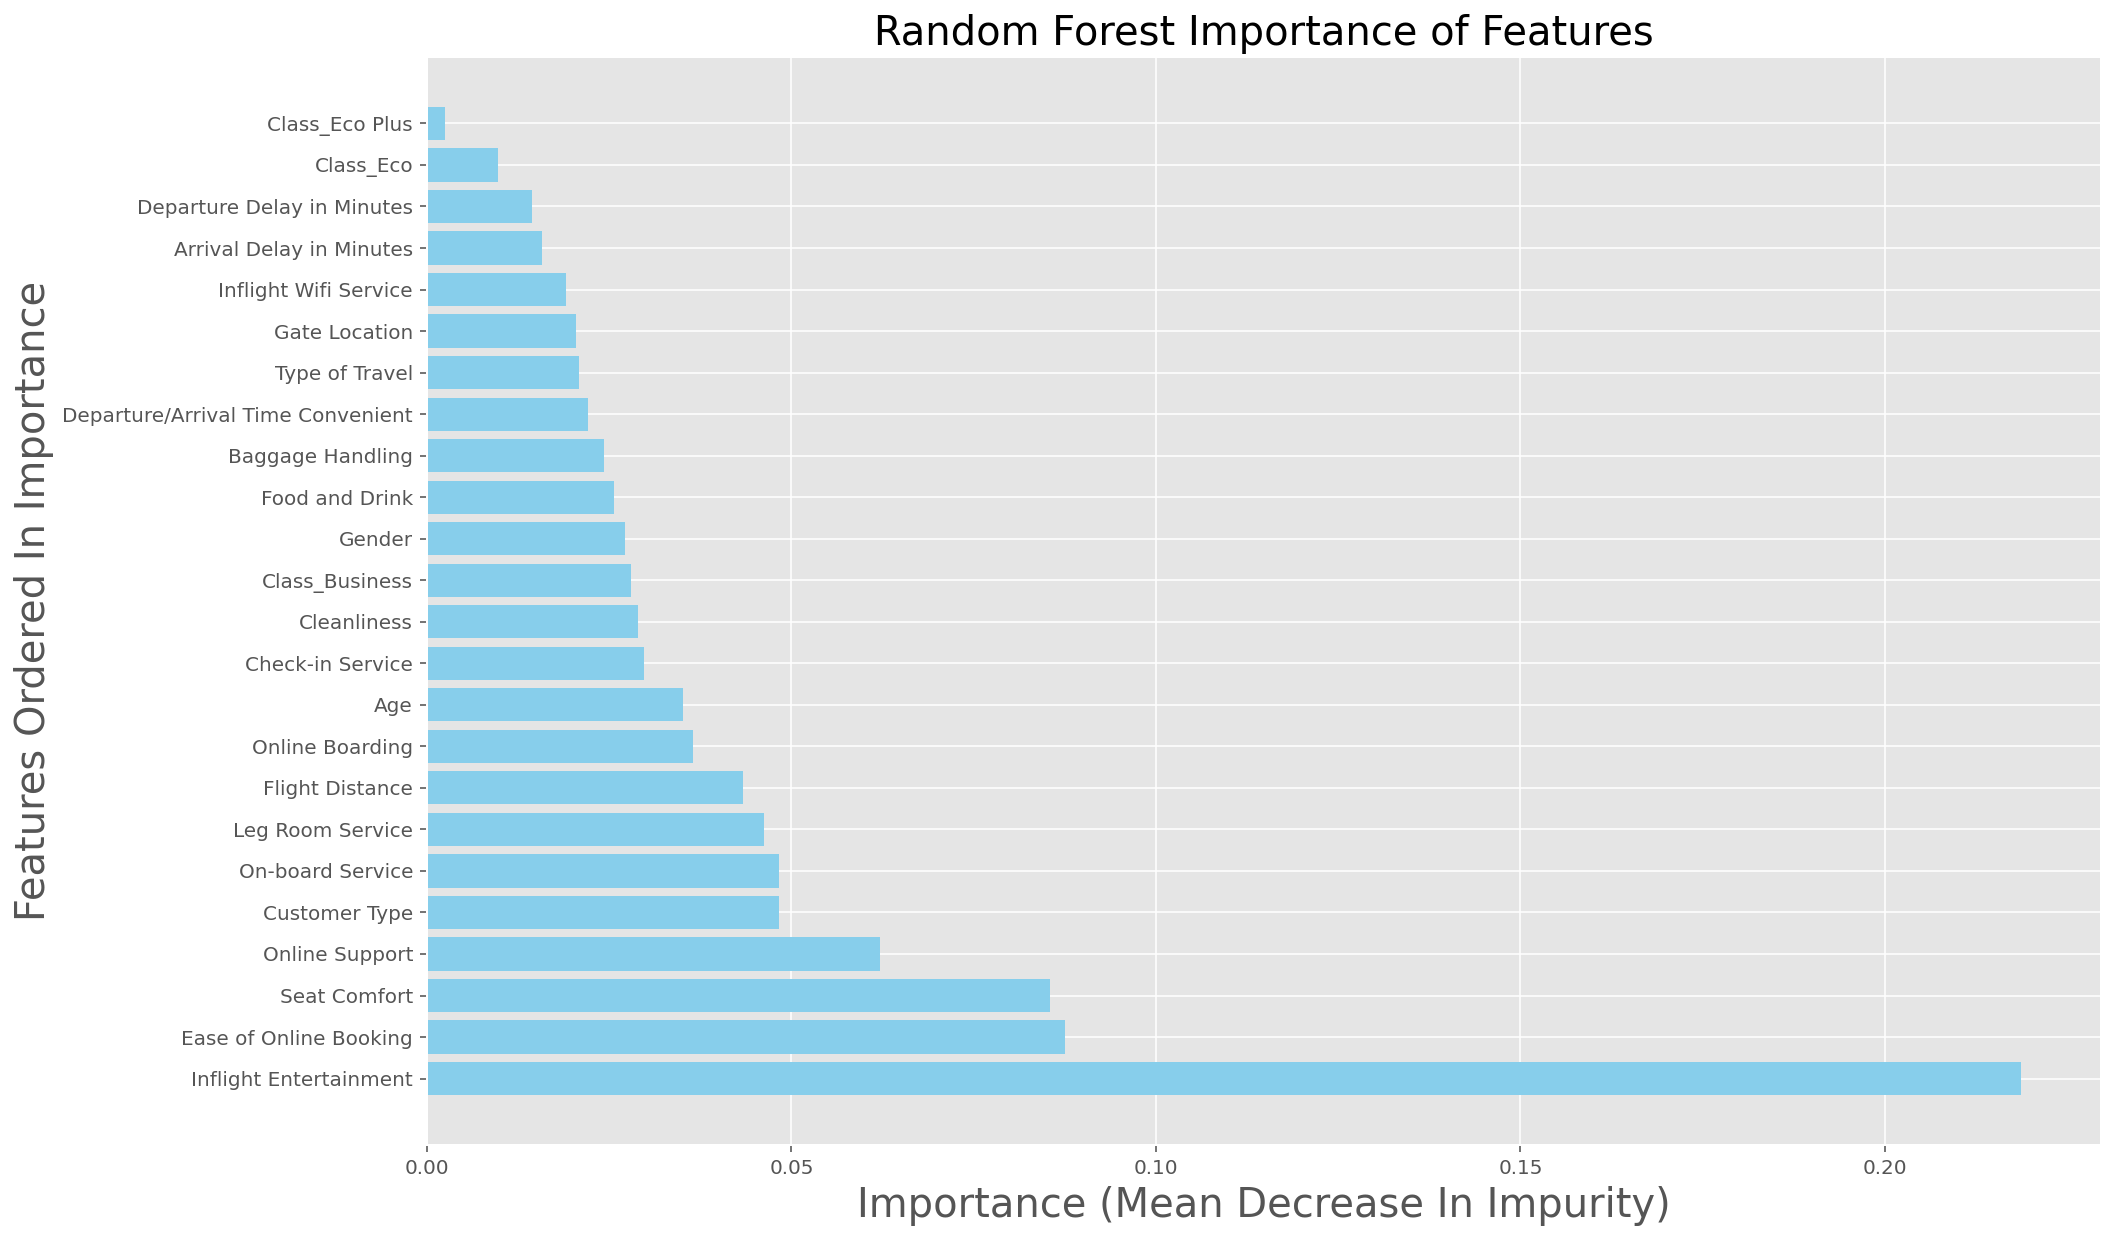

In [104]:
def importance_plot(b_feat, score, method):   
    plt.figure(figsize=(15,10))
    plt.barh(b_feat, score, align='center',  color="skyblue")
    plt.title(method+ ' Importance of Features', fontsize = 20)
    plt.xlabel("Importance (Mean Decrease In Impurity)", fontsize = 20)
    plt.ylabel("Features Ordered In Importance", fontsize = 20)
    plt.show()

importance_plot(best_features_rfi, feat_imp, 'Random Forest')


In [105]:
# Top 15 features by importance
feats = ['Inflight Entertainment', 'Ease of Online Booking', 'Seat Comfort',
       'Online Support', 'Leg Room Service', 'Customer Type',
       'Flight Distance', 'On-board Service', 'Age', 'Online Boarding',
       'Check-in Service', 'Cleanliness', 'Gender', 'Baggage Handling',
       'Food and Drink']

- Below, the Train data and the Test data is being created using "train_test_split" from Sklearn.

In [106]:
from sklearn.model_selection import train_test_split

d_sample = airplane_df_scaled.drop("Satisfaction", axis = 1).values 
d_target = airplane_df_scaled['Satisfaction'].values

d_train, d_test, t_train, t_test = train_test_split(d_sample, d_target, 
                                                    test_size = 0.3, random_state=999,
                                                    stratify = d_target)

print(d_train.shape)
print(d_test.shape)

(3500, 24)
(1500, 24)


## **Model Fitting & Tuning** <a name="modfit"></a>

-   Setting up the Cross Validation Method.
    -   5 folds will be utlilised throughout the model analysis to reduce bias and increase the performance of the models.

In [107]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV       

cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

-   Code below utilised and adapted from [FeatureRanking.com](https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/#3)
-   This class will help loop through and choose the most important features and the optimal number of features
-   Below that is the code used to parse the CV results into a Pandas DataFrame to be used for plotting

In [108]:

from sklearn.base import BaseEstimator, TransformerMixin

# function for random forest importance inside a pipeline
# unsing n_estimor = 100
class RF_Feat_Selector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=15):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]


# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]


-   **The different algorithms being utilised will essentially follow the same format**
-   **Hence, only the KNN algorithm will be commentated on so as to provide a brief understand of the methodology & the steps being employed**

**Steps for all the models:**
-   All models utilise the "RF_Feat_Selector" class and the algortihm itself inside a pipeline.
-   Hyperoptimisation is then performed to fine tune the model using "GridSearchCV" with the scoring metric being set to ROC-AUC. At this point cross validation is performed.
-   The Model is then fit to the training data
-   Following this, the performance of the algorithm is analysed with the best parameters used to obtain the highest ROC-AUC score being displayed
-   The Grid Search results are then parsed into a Pandas Dataframe with the Dataframe then being plotted to analyse the performance of the different parameter setups
-   Lastly, the model is critiqued and analysed against the test data using a "classification_report" to evaluate moel performance and obtain a final result.

### KNN

-   The K-nearest neighbors algorithm is being setup
-   GridSearchCV is also setup here

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


# Setting up the KNN model Pipline 
pipe_KNN = Pipeline(steps=[('rfi_fs', RF_Feat_Selector()), 
                           ('knn', KNeighborsClassifier())])


# Setting up the parameters to be hyperoptimised
params_pipe_KNN = {'rfi_fs__n_features_': [10, 15, 20, 24],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [0.5, 1, 2, 5]}


# Using Gridsearch to hyperoptimise the params as well as performing cross validation
gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',   # Must ensure that the scoring metric is set to ROC_AUC as defualt value is None
                           verbose=1) 

- Fitting the Model to the training dataset

In [110]:
gs_pipe_KNN.fit(d_train, t_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', RF_Feat_Selector()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-2,
             param_grid={'knn__n_neighbors': [1, 5, 10, 15, 20],
                         'knn__p': [0.5, 1, 2, 5],
                         'rfi_fs__n_features_': [10, 15, 20, 24]},
             scoring='roc_auc', verbose=1)

- Ascertaining the best parameters and the subsequent ROC-AUC score

In [111]:
print(f'Best Params: {gs_pipe_KNN.best_params_}')
print(f'Best Score: {gs_pipe_KNN.best_score_}')

Best Params: {'knn__n_neighbors': 10, 'knn__p': 1, 'rfi_fs__n_features_': 20}
Best Score: 0.9736092941360386


- Parsing the results into a Pandas DataFrame so that they can be plotted

In [127]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
38,0.973609,0.003875,0.977489,0.968315,10.0,1.0,20.0
70,0.972136,0.004094,0.977666,0.966858,20.0,1.0,20.0
54,0.971436,0.004863,0.977361,0.965912,15.0,1.0,20.0
55,0.970896,0.003459,0.974983,0.964526,15.0,1.0,24.0
71,0.970651,0.002887,0.973519,0.965373,20.0,1.0,24.0


-   Plotting the results

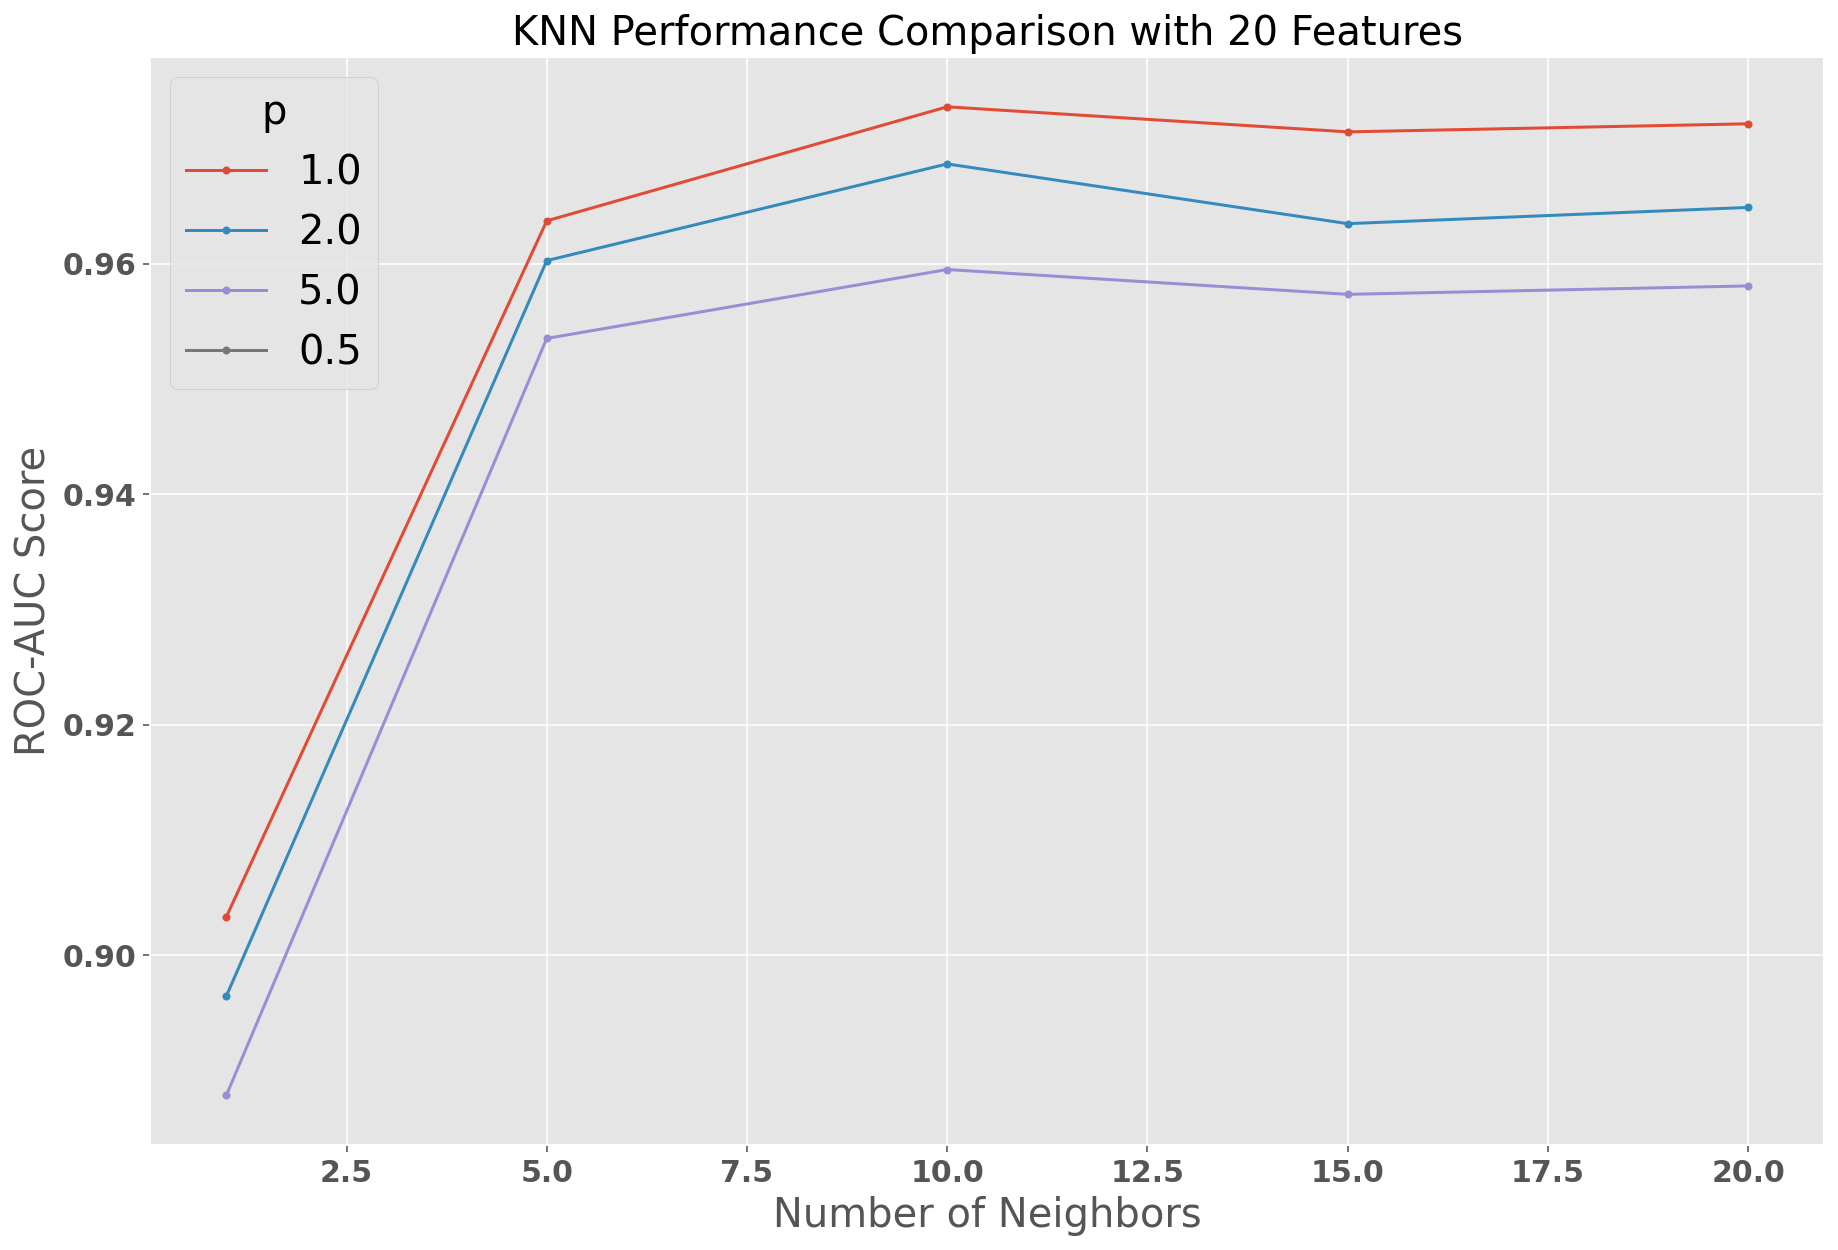

In [113]:
KNN_results = results_KNN[results_KNN['rfi_fs__n_features_'] == gs_pipe_KNN.best_params_['rfi_fs__n_features_']]    # PLotting the Parameters of the optimum number of features

plt.figure(figsize=(15,10)) # Setting the PLot size

for i in KNN_results['knn__p'].unique():
    
    temp = KNN_results[KNN_results['knn__p'] == i]  # Temporary Dataframe for each number of neighbours
    lists = sorted(zip(*[temp['knn__n_neighbors'], temp['mean_score']]))    # ZIpping the Temp df with its respective scores
    new_x, new_y = list(zip(*lists))    
    plt.plot(new_x, new_y, marker = '.', label = i) # PLotting the Line
    
plt.legend(title = "p", fontsize = 20, title_fontsize = 20)
plt.xlabel('Number of Neighbors', fontsize = 20)
plt.ylabel("ROC-AUC Score", fontsize = 20)

plt.xticks( weight = 'bold', fontsize = 15)
plt.yticks( weight = 'bold', fontsize = 15)

plt.title(f"KNN Performance Comparison with {gs_pipe_KNN.best_params_['rfi_fs__n_features_']} Features", fontsize = 20)
plt.show()

**FINAL MODEL**
- Critiquing and analsying the model on the test data
- Evaluating performance of model using "classification_report"

In [114]:
# Using best parameters on model and testing with Test data.
from sklearn.metrics import classification_report, accuracy_score , roc_auc_score

np.random.seed(999) # Setting Random Seed

d_train_final = d_train[:, np.r_[fs_indices_rfi[0 : gs_pipe_KNN.best_params_['rfi_fs__n_features_']]]]  # Utilised "gs_pipe_KNN.best_params_['rfi_fs__n_features_']" as it gives us the optimal number of Features
d_test_final = d_test[:, np.r_[fs_indices_rfi[0 : gs_pipe_KNN.best_params_['rfi_fs__n_features_']]]]


knn_classifier = KNeighborsClassifier(n_neighbors = gs_pipe_KNN.best_params_['knn__n_neighbors'], p=1)   # Using "gs_pipe_KNN.best_params_['knn__n_neighbors']" as it provides us with the optimal number of Neighbors found using GridsearchCV

knn_classifier.fit(d_train_final, t_train)  # Fitting the data

y_predict = knn_classifier.predict(d_test_final)    # Predicintg the test Data

print('Accuracy score:',accuracy_score(t_test,y_predict))
print('ROC-AUC score:',roc_auc_score(t_test,y_predict))
print(classification_report(t_test,y_predict))

Accuracy score: 0.908
AUC score: 0.9102616256668776
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       683
         1.0       0.94      0.88      0.91       817

    accuracy                           0.91      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.91      0.91      0.91      1500



### Naive Bayes (NB) (Gaussian)

- Training Data is transformed as it is required to follow a Gaussian distribution

In [115]:
from sklearn.preprocessing import PowerTransformer
d_train_transformed = PowerTransformer().fit_transform(d_train)

In [139]:
from sklearn.naive_bayes import GaussianNB


pipe_NB = Pipeline([('rfi_fs', RF_Feat_Selector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],#,
                  'nb__var_smoothing':    [1, 0.01, 0.001] } # np.logspace(1,-3, num=200)}     # Commented out as not required


gs_pipe_NB = GridSearchCV(estimator=pipe_NB, 
                          param_grid=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 


In [140]:
gs_pipe_NB.fit(d_train_transformed, t_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', RF_Feat_Selector()),
                                       ('nb', GaussianNB())]),
             n_jobs=-2,
             param_grid={'nb__var_smoothing': [1, 0.01, 0.001],
                         'rfi_fs__n_features_': [5, 10, 15, 20, 24]},
             scoring='roc_auc', verbose=1)

In [141]:
print(f'Best Params: {gs_pipe_NB.best_params_}')
print(f'Best Score: {gs_pipe_NB.best_score_}')


Best Params: {'nb__var_smoothing': 0.01, 'rfi_fs__n_features_': 24}
Best Score: 0.9287520878072059


In [142]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,nb__var_smoothing,rfi_fs__n_features_
9,0.928752,0.009003,0.938423,0.916447,0.010,24.0
14,0.928645,0.009054,0.938448,0.916455,0.001,24.0
8,0.927531,0.009821,0.942307,0.916241,0.010,20.0
13,0.927473,0.009834,0.942249,0.916389,0.001,20.0
7,0.926289,0.009541,0.940719,0.913238,0.010,15.0


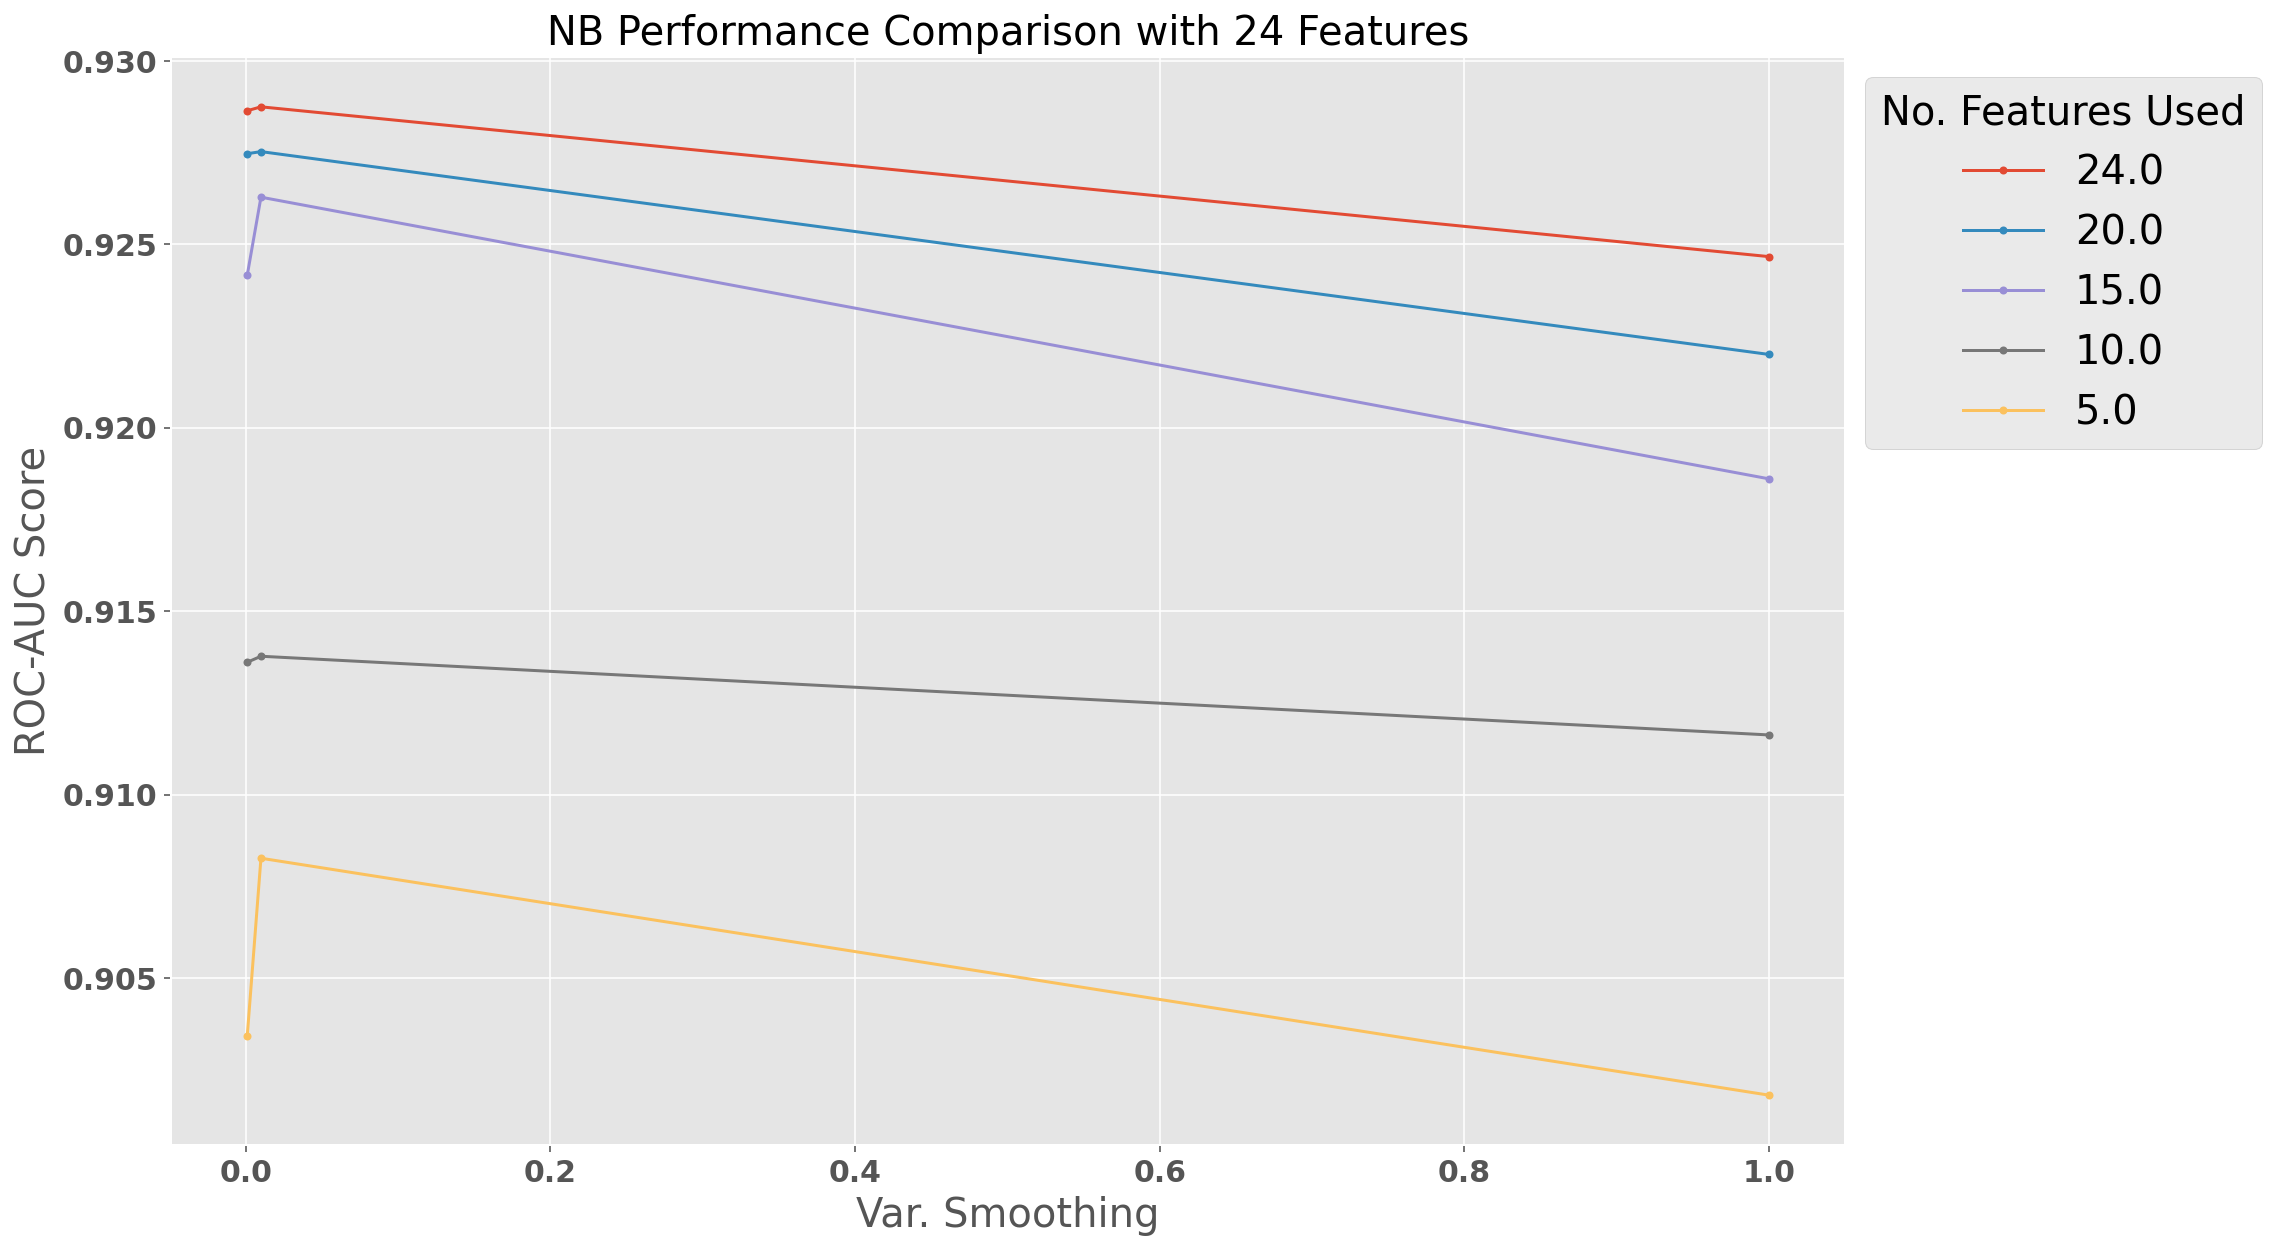

In [186]:
plt.figure(figsize=(15,10)) # Setting the PLot size


for i in results_NB['rfi_fs__n_features_'].unique():
    
    temp = results_NB[results_NB['rfi_fs__n_features_'] == i]
    lists = sorted(zip(*[temp['nb__var_smoothing'], temp['mean_score']]))
    new_x, new_y = list(zip(*lists))
    plt.plot(new_x, new_y, marker = '.', label = i)


plt.legend(title = "No. Features Used", fontsize = 20, title_fontsize = 20, bbox_to_anchor=[1, 1])
plt.xlabel('Var. Smoothing', fontsize = 20)
plt.ylabel("ROC-AUC Score", fontsize = 20)

plt.xticks( weight = 'bold', fontsize = 15)
plt.yticks( weight = 'bold', fontsize = 15)

plt.title(f"NB Performance Comparison with {gs_pipe_NB.best_params_['rfi_fs__n_features_']} Features", fontsize = 20)
plt.show()

**FINAL MODEL**

In [152]:
d_train_final = d_train[:, np.r_[fs_indices_rfi[0:gs_pipe_NB.best_params_['rfi_fs__n_features_']]]]
d_test_final = d_test[:, np.r_[fs_indices_rfi[0:gs_pipe_NB.best_params_['rfi_fs__n_features_']]]]

np.random.seed(999)

NB_classifier = GaussianNB(var_smoothing= gs_pipe_NB.best_params_['nb__var_smoothing'])
NB_classifier.fit(d_train_final, t_train)

y_predict = NB_classifier.predict(d_test_final)

print('Accuracy score:',accuracy_score(t_test,y_predict))
print('ROC-AUC score:',roc_auc_score(t_test,y_predict))
print(classification_report(t_test,y_predict))

Accuracy score: 0.84
AUC score: 0.842915283032055
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       683
         1.0       0.89      0.81      0.85       817

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500



### Decision Tree (DT)

In [153]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RF_Feat_Selector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=111))])

params_pipe_DT = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                  'dt__max_depth': [3, 4, 5, 10],
                  'dt__min_samples_split': [1, 2, 5, 10]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 



In [154]:
gs_pipe_DT.fit(d_train, t_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', RF_Feat_Selector()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=111))]),
             n_jobs=-2,
             param_grid={'dt__max_depth': [3, 4, 5, 10],
                         'dt__min_samples_split': [1, 2, 5, 10],
                         'rfi_fs__n_features_': [5, 10, 15, 20, 24]},
             scoring='roc_auc', verbose=1)

In [155]:
print(f'Best Params: {gs_pipe_DT.best_params_}')
print(f'Best Score: {gs_pipe_DT.best_score_}')

Best Params: {'dt__max_depth': 10, 'dt__min_samples_split': 10, 'rfi_fs__n_features_': 5}
Best Score: 0.9412312097351467


In [202]:

results_DT = get_search_results(gs_pipe_DT)
results_DT_features = results_DT[results_DT['rfi_fs__n_features_'] == gs_pipe_DT.best_params_['rfi_fs__n_features_']]
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
75,0.941231,0.005523,0.950102,0.935860,10.0,10.0,5.0
55,0.940636,0.002215,0.943319,0.936699,5.0,10.0,5.0
45,0.939456,0.001882,0.941912,0.936699,5.0,2.0,5.0
50,0.939179,0.002025,0.941912,0.935988,5.0,5.0,5.0
47,0.938007,0.002069,0.941529,0.935292,5.0,2.0,15.0


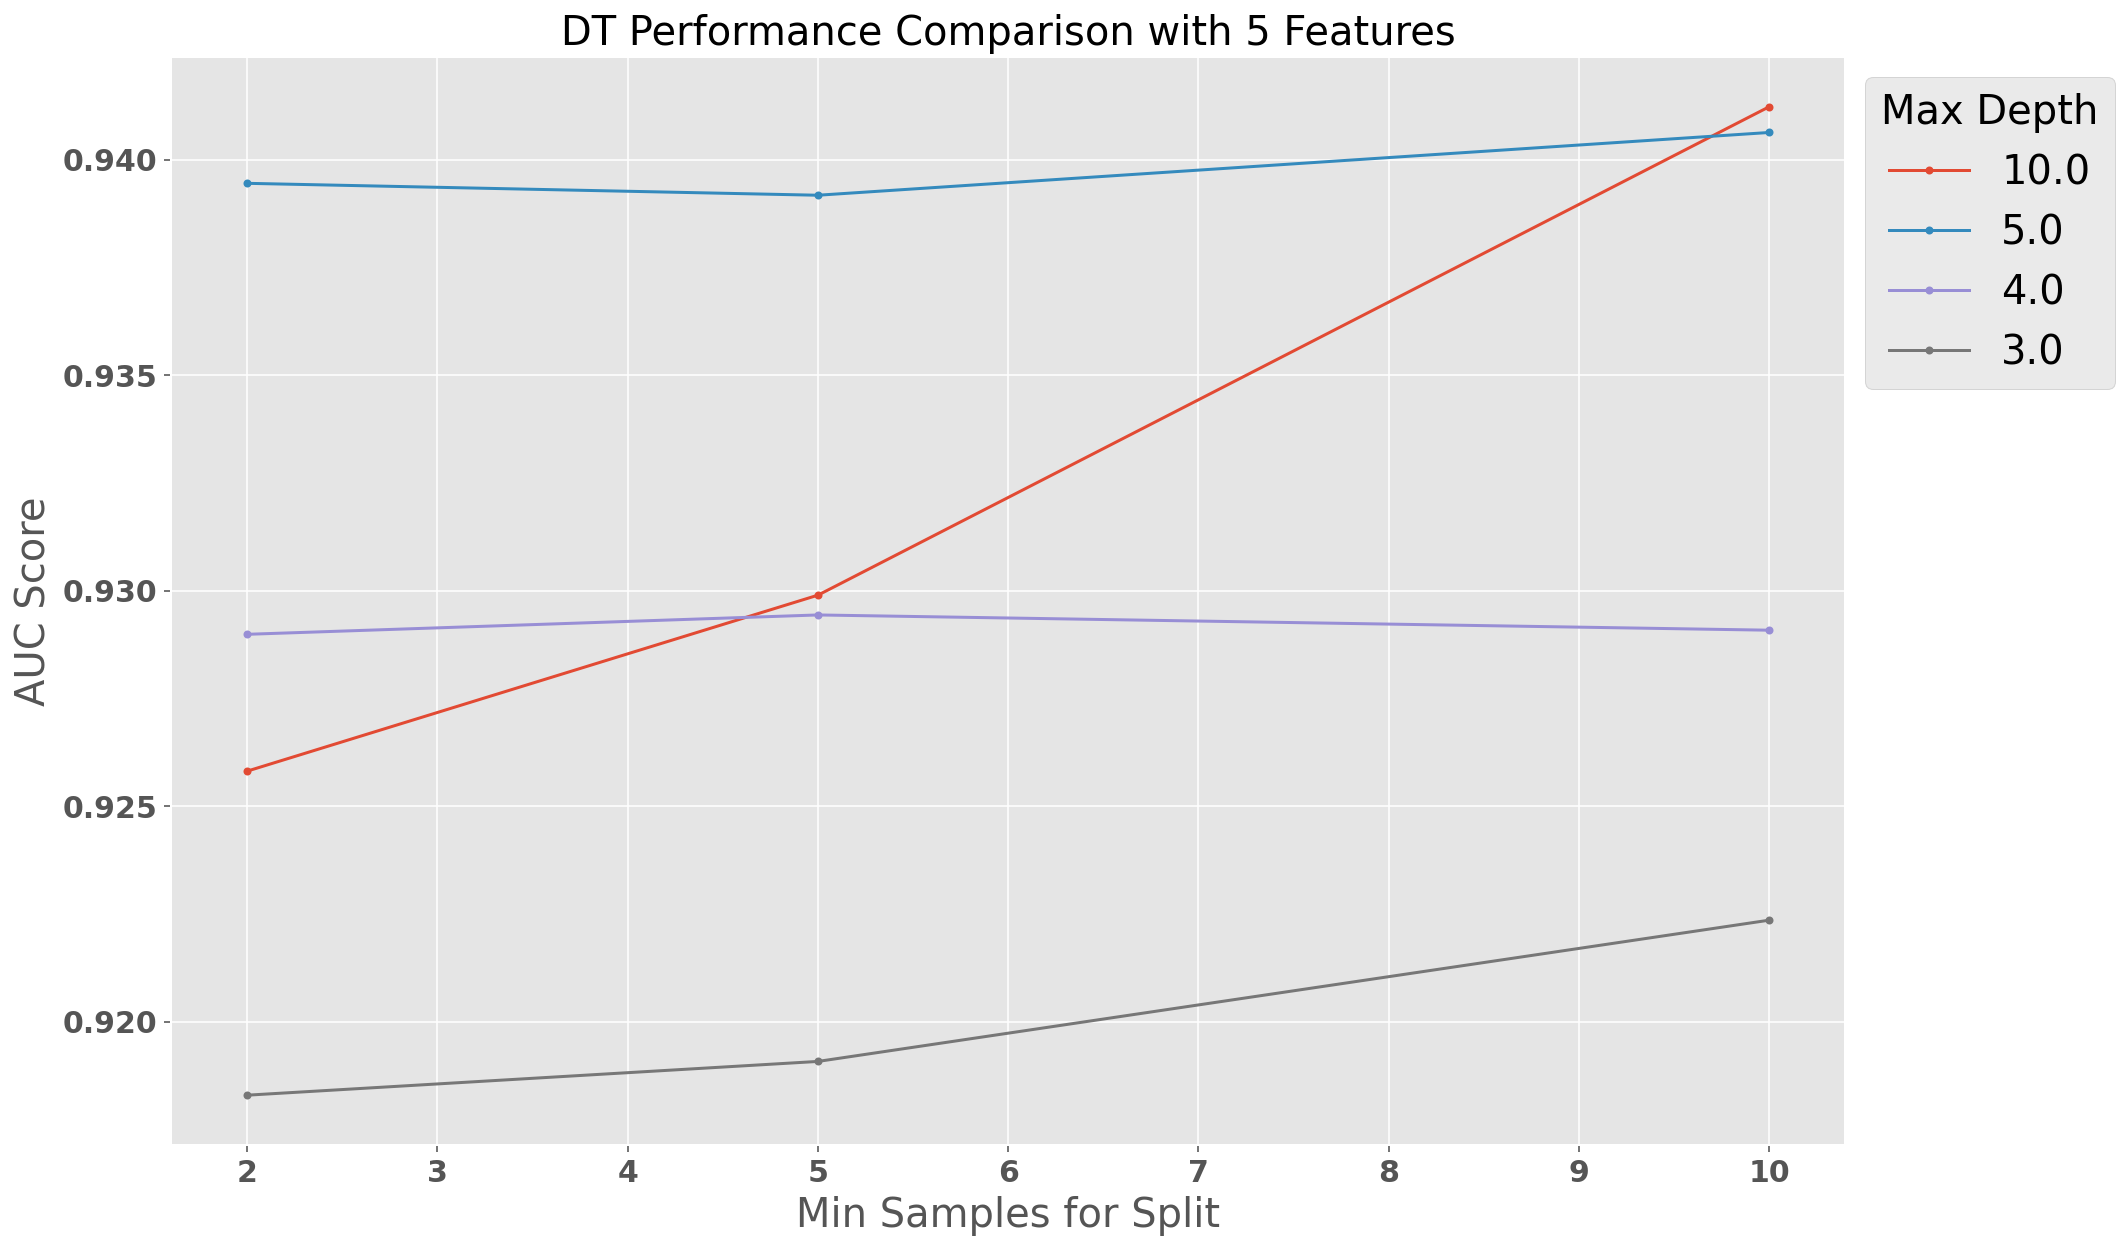

In [164]:

plt.figure(figsize=(15,10)) # Setting the PLot size

for i in results_DT_features['dt__max_depth'].unique():
    temp = results_DT_features[results_DT_features['dt__max_depth'] == i]
    lists = sorted(zip(*[temp['dt__min_samples_split'], temp['mean_score']]))
    new_x, new_y = list(zip(*lists))
    plt.plot(new_x, new_y, marker = '.', label = i)
    
plt.legend(title = "Max Depth", fontsize = 20, title_fontsize = 20, bbox_to_anchor=[1, 1])
plt.xlabel('Min Samples for Split', fontsize = 20)
plt.ylabel("ROC-AUC Score", fontsize = 20)

plt.xticks( weight = 'bold', fontsize = 15)
plt.yticks( weight = 'bold', fontsize = 15)

plt.title(f"DT Performance Comparison with {gs_pipe_DT.best_params_['rfi_fs__n_features_']} Features", fontsize = 20)
plt.show()

**FINAL MODEL**

In [165]:
d_train_final = d_train[:, np.r_[fs_indices_rfi[0:gs_pipe_DT.best_params_['rfi_fs__n_features_']]]]
d_test_final = d_test[:, np.r_[fs_indices_rfi[0:gs_pipe_DT.best_params_['rfi_fs__n_features_']]]]

np.random.seed(999)

DT_classifier = DecisionTreeClassifier(criterion='gini', random_state=111,max_depth=gs_pipe_DT.best_params_['dt__max_depth'],min_samples_split=gs_pipe_DT.best_params_['dt__min_samples_split'])
DT_classifier.fit(d_train_final, t_train)

y_predict = DT_classifier.predict(d_test_final)

print('Accuracy score:',accuracy_score(t_test,y_predict))
print('ROC-AUC score:',roc_auc_score(t_test,y_predict))
print(classification_report(t_test,y_predict))

Accuracy score: 0.8866666666666667
AUC score: 0.8880362573497654
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       683
         1.0       0.92      0.87      0.89       817

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



### Logistic regression (LR)

In [173]:
from sklearn.linear_model import LogisticRegression

pipe_LR = Pipeline([('rfi_fs', RF_Feat_Selector()), 
                     ('lr', LogisticRegression())])

params_pipe_LR = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                     'lr__C':[100, 10, 1.0, 0.1, 0.01]
                  }

gs_pipe_LR = GridSearchCV(estimator=pipe_LR, 
                          param_grid=params_pipe_LR, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 



In [174]:
gs_pipe_LR.fit(d_train, t_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', RF_Feat_Selector()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-2,
             param_grid={'lr__C': [100, 10, 1.0, 0.1, 0.01],
                         'rfi_fs__n_features_': [5, 10, 15, 20, 24]},
             scoring='roc_auc', verbose=1)

In [175]:
print(f'Best Params: {gs_pipe_LR.best_params_}')
print(f'Best Score: {gs_pipe_LR.best_score_}')

Best Params: {'lr__C': 1.0, 'rfi_fs__n_features_': 24}
Best Score: 0.9411184887155561


In [182]:
results_LR = get_search_results(gs_pipe_LR)


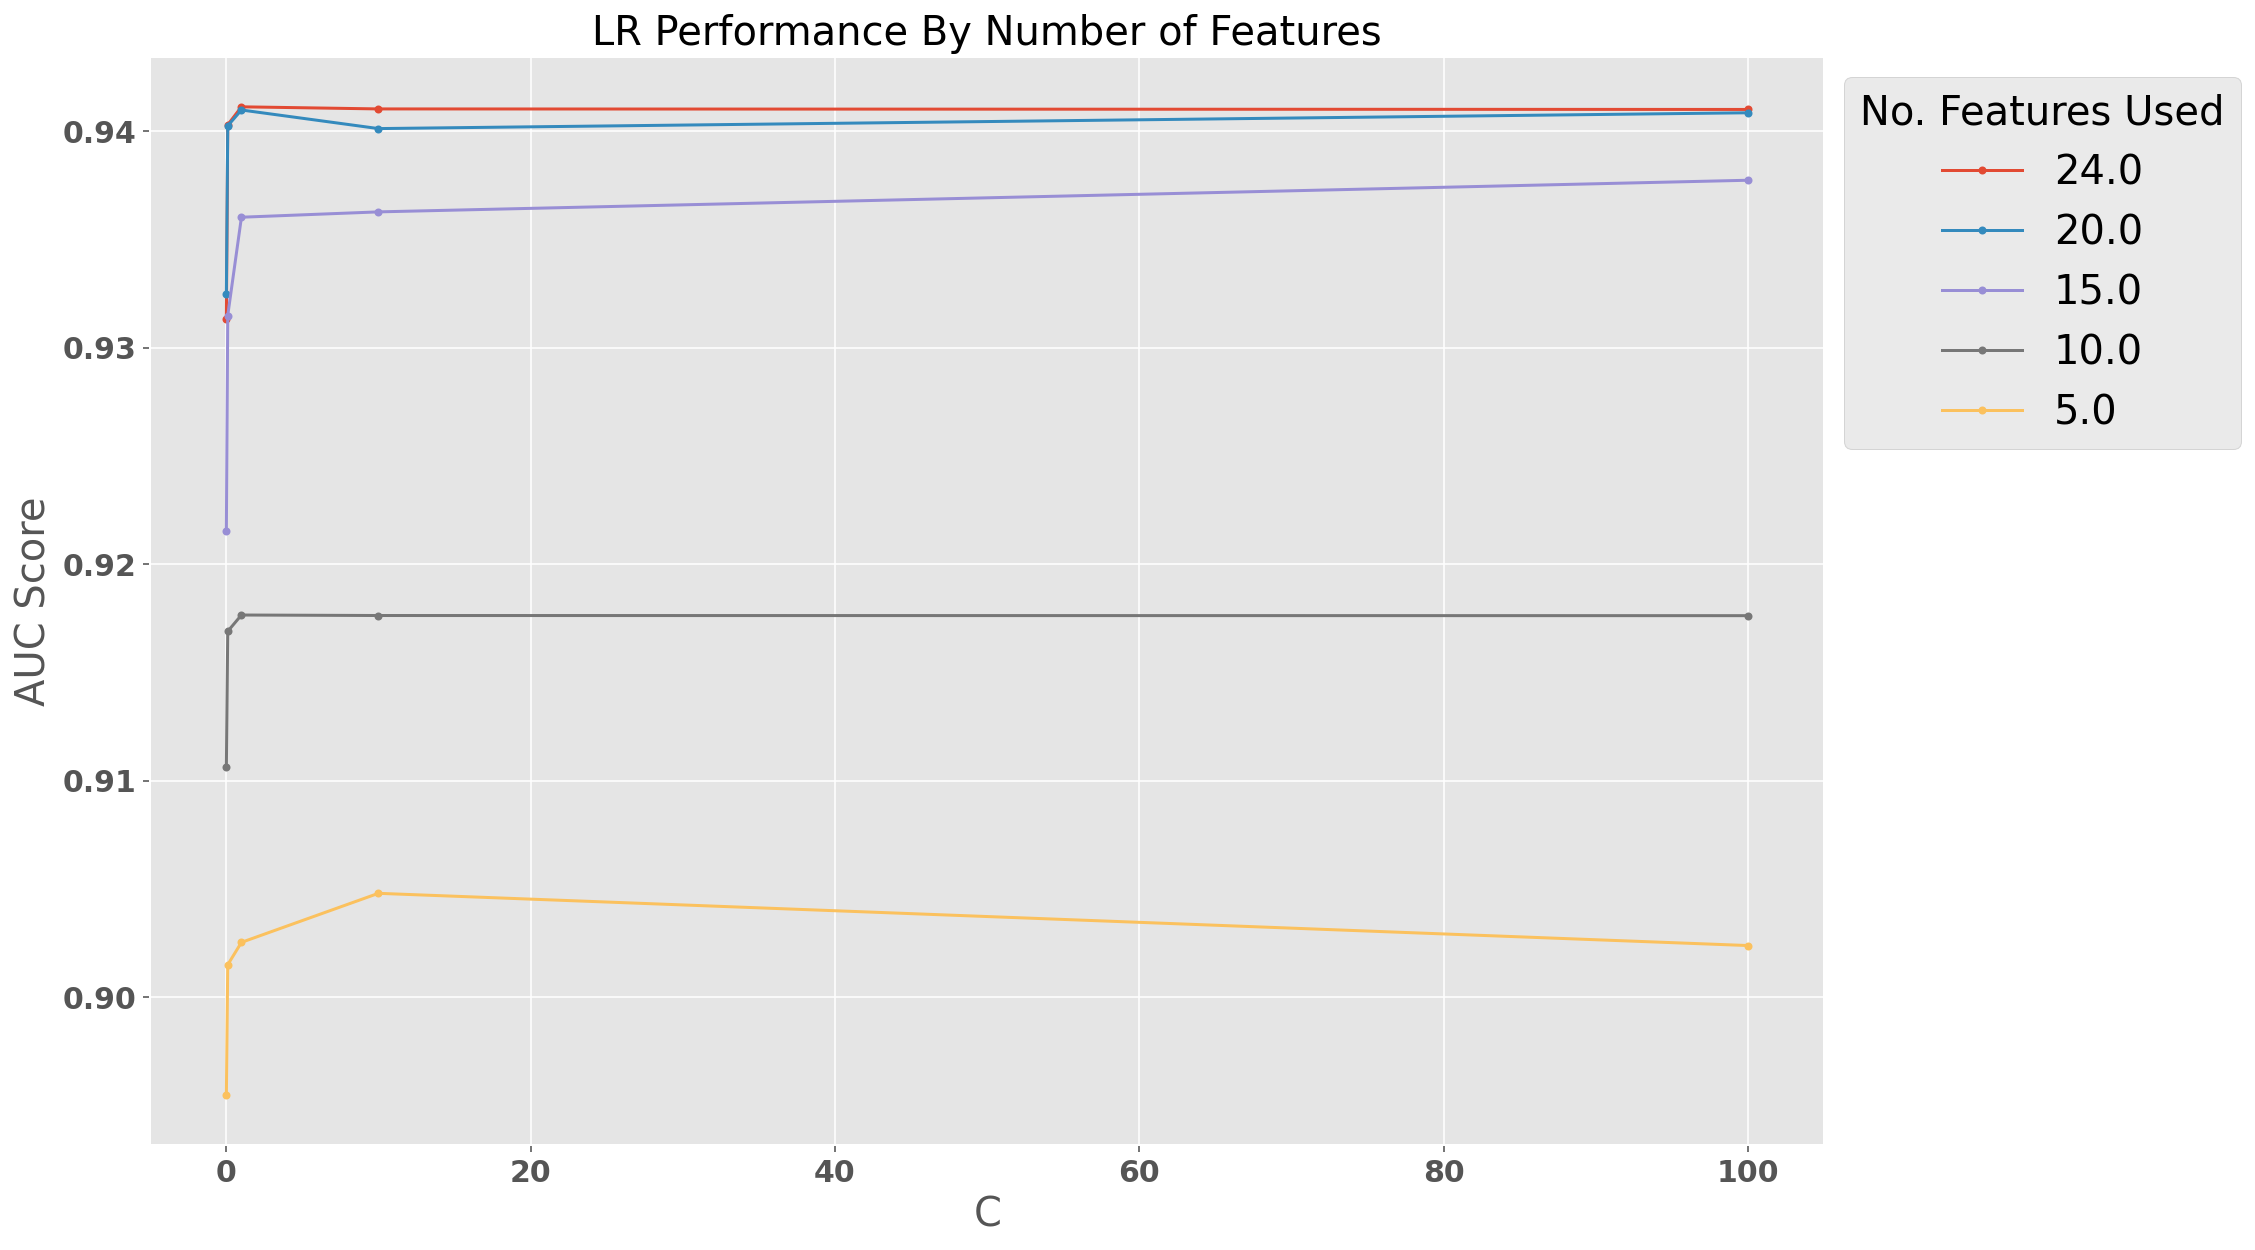

In [187]:
plt.figure(figsize=(15,10)) # Setting the PLot size

for i in results_LR['rfi_fs__n_features_'].unique():
   
   temp = results_LR[results_LR['rfi_fs__n_features_'] == i]
   lists = sorted(zip(*[temp['lr__C'], temp['mean_score']]))
   new_x, new_y = list(zip(*lists))
   plt.plot(new_x, new_y, marker = '.', label = i)



plt.legend(title = "No. Features Used", fontsize = 20, title_fontsize = 20, bbox_to_anchor=[1, 1])
plt.xlabel('C', fontsize = 20)
plt.ylabel("ROC-AUC Score", fontsize = 20)

plt.xticks( weight = 'bold', fontsize = 15)
plt.yticks( weight = 'bold', fontsize = 15)

plt.title("LR Performance By Number of Features", fontsize = 20)
plt.show()

**FINAL MODEL**

In [188]:
gs_pipe_LR.best_params_['rfi_fs__n_features_']

24

In [189]:
d_train_final = d_train[:, np.r_[fs_indices_rfi[0:gs_pipe_LR.best_params_['rfi_fs__n_features_']]]]
d_test_final = d_test[:, np.r_[fs_indices_rfi[0:gs_pipe_LR.best_params_['rfi_fs__n_features_']]]]

np.random.seed(999)

LR_classifier = LogisticRegression(C=gs_pipe_LR.best_params_['lr__C'],penalty='l2',solver='newton-cg')
LR_classifier.fit(d_train_final, t_train)

y_predict = LR_classifier.predict(d_test_final)


print('Accuracy score:',accuracy_score(t_test,y_predict))
print('ROC-AUC score:',roc_auc_score(t_test,y_predict))
print(classification_report(t_test,y_predict))

Accuracy score: 0.8606666666666667
AUC score: 0.8596058142223003
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       683
         1.0       0.87      0.87      0.87       817

    accuracy                           0.86      1500
   macro avg       0.86      0.86      0.86      1500
weighted avg       0.86      0.86      0.86      1500



### SVM

In [36]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
 

pipe_SVM = Pipeline(steps=[('rfi_fs', RF_Feat_Selector()), 
                     ('svm', SVC())])


params_pipe_SVM = {'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                   'svm__C': [0.1, 1, 10, 100, 1000],
                    'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                    'svm__kernel': ['rbf', 'linear', 'poly']
                   }


 
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

gs_pipe_SVM = GridSearchCV(estimator=pipe_SVM, 
                           param_grid=params_pipe_SVM, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 


Fitting 5 folds for each of 375 candidates, totalling 1875 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', RF_Feat_Selector()),
                                       ('svm', SVC())]),
             n_jobs=-2,
             param_grid={'rfi_fs__n_features_': [5, 10, 15, 20, 24],
                         'svm__C': [0.1, 1, 10, 100, 1000],
                         'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svm__kernel': ['rbf', 'linear', 'poly']},
             scoring='roc_auc', verbose=1)

In [ ]:
gs_pipe_SVM.fit(d_train, t_train)

In [206]:
print(f'Best Params: {gs_pipe_SVM.best_params_}')
print(f'Best Score: {gs_pipe_SVM.best_score_}')

Best Params: {'rfi_fs__n_features_': 20, 'svm__C': 100, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best Score: 0.9777849085478735


In [205]:
results_SVM = get_search_results(gs_pipe_SVM)
results_SVM.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,svm__C,svm__gamma,svm__kernel
273,0.977785,0.003573,0.982302,0.972445,20,100,0.1,rbf
260,0.97777,0.00451,0.983528,0.972577,20,10,0.1,poly
333,0.977729,0.003918,0.98152,0.97117,24,10,0.1,rbf
335,0.977643,0.003888,0.982047,0.97256,24,10,0.1,poly
366,0.977489,0.003837,0.981199,0.97117,24,1000,0.01,rbf


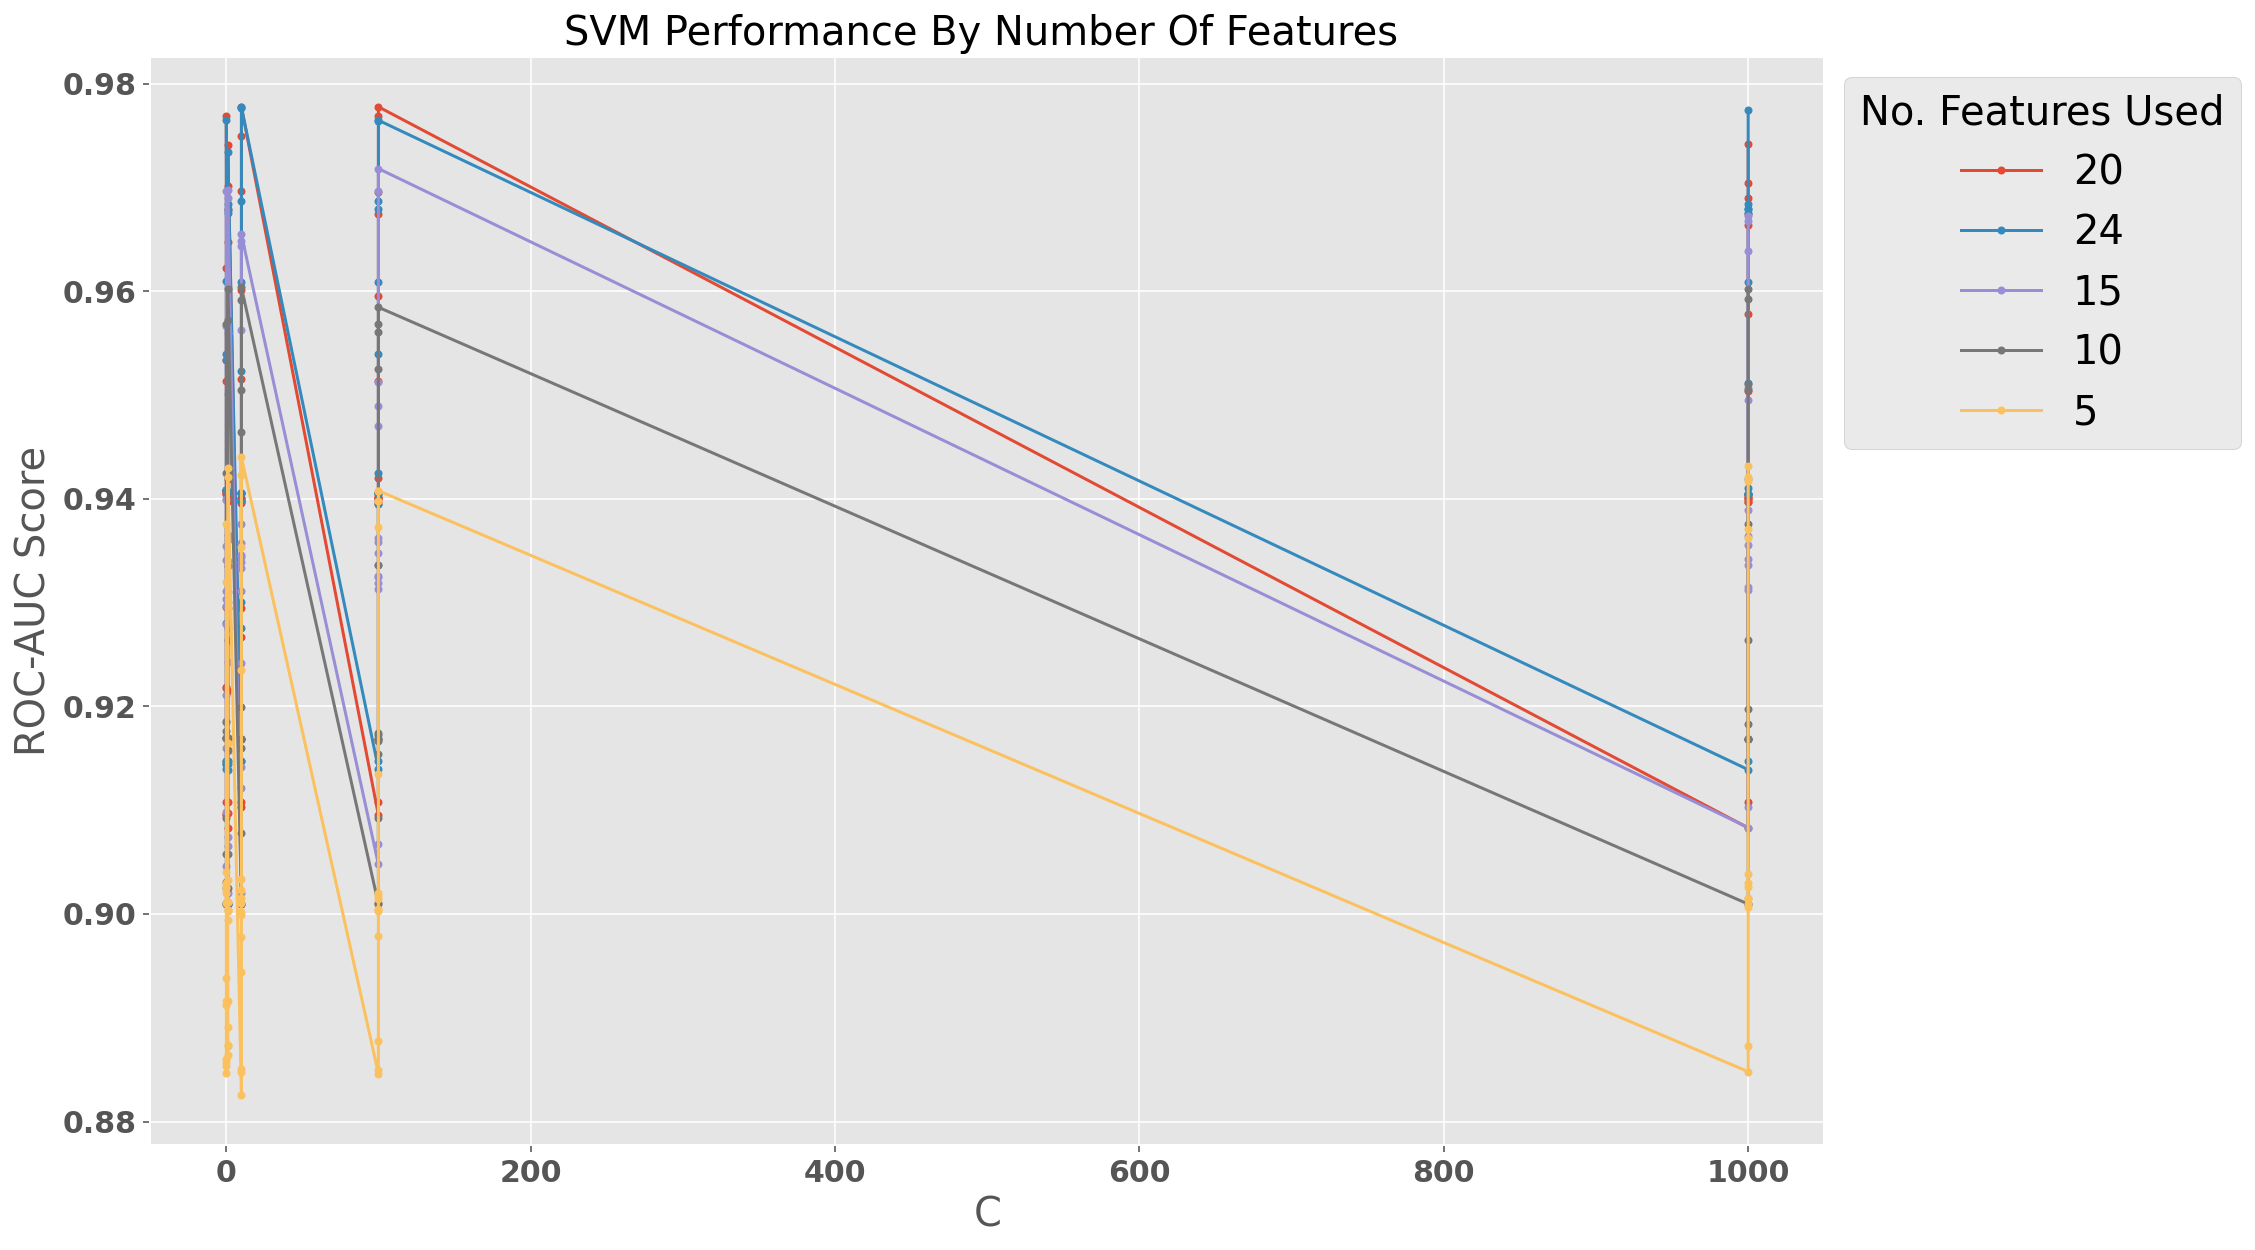

In [204]:
plt.figure(figsize=(15,10)) # Setting the PLot size
for i in results_SVM['rfi_fs__n_features_'].unique():
   
   temp = results_SVM[results_SVM['rfi_fs__n_features_'] == i]
   lists = sorted(zip(*[temp['svm__C'], temp['mean_score']]))
   new_x, new_y = list(zip(*lists))
   plt.plot(new_x, new_y, marker = '.', label = i)



plt.legend(title = "No. Features Used", fontsize = 20, title_fontsize = 20, bbox_to_anchor=[1, 1])
plt.xlabel('C', fontsize = 20)
plt.ylabel("ROC-AUC Score", fontsize = 20)

plt.xticks( weight = 'bold', fontsize = 15)
plt.yticks( weight = 'bold', fontsize = 15)

plt.title("SVM Performance By Number Of Features ", fontsize = 20)
plt.show()


**FINAL MODEL**

In [207]:
d_train_final = d_train[:, np.r_[fs_indices_rfi[0:gs_pipe_SVM.best_params_['rfi_fs__n_features_']]]]
d_test_final = d_test[:, np.r_[fs_indices_rfi[0:gs_pipe_SVM.best_params_['rfi_fs__n_features_']]]]

np.random.seed(999)

SVM_classifier = SVC(C=gs_pipe_SVM.best_params_['svm__C'],gamma=gs_pipe_SVM.best_params_['svm__gamma'],kernel=gs_pipe_SVM.best_params_['svm__kernel'])
SVM_classifier.fit(d_train_final, t_train)

y_predict = SVM_classifier.predict(d_test_final)


print('Accuracy score:',accuracy_score(t_test,y_predict))
print('ROC-AUC score:',roc_auc_score(t_test,y_predict))
print(classification_report(t_test,y_predict))

Accuracy score: 0.922
ROC-AUC score: 0.9219128296754007
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       683
         1.0       0.93      0.92      0.93       817

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



## **Neural Network Model Fitting & Tuning** <a name="MC"></a>

Neural networks are simply a series of algorithms interconnected by nodes called artificial neurons, whose aim is to mimic the behavioural operation of the human brain. The most common forms of neural networks consist of three-layer types of input units, hidden units, and output units. Input and output layers represent the raw data fed into the network and the final target values determined by the hidden units and their respective weights. The hidden units in our neural networks consists of two layer types: a dense layer and a dropout layer. The dense layer consists of fully connect nodes, the activity of which is determined by the input units, weights associated with their connections and the activation function used. The dropout layer is used to ignore a random set of neurons in the dense layer as to avoid overfitting.

The topology of our neural network consists of 24 input features with 1 input layer, 2 hidden layers each with their respective dropout layer (which is used to reduce the chance of overfitting) and an output layer. Only 2 hidden layers were used for our neural architecture to limit the computational intensity of further hyperparameter tuning. As not all the parameters of our neural network were tuned, optimal static values were chosen for binary classification purposes. These values include: 
-	**Optimizer used:** Stochastic gradient descent with a decay of 1e^-6 and momentum of 0.5  
        ->  Stochastic gradient descent is a popular optimizer algorithm for finding the optimal model parameters that correspond to the best fit. It is a gradient descent algorithm in which the gradient is calculated using only a small part of observations to reduce computation time 
-	**Metrics used:** Accuracy 
-	**Output activation function:** sigmoid  
        -> Sigmoid functions must be used as the output activation function for binary classification problems whose output is always between 0 and 1

In additional to these default values, hyperparameter tuning was also performed incrementally on: 
-	Batch size: size of data to input into the neural network at each training iteration 
-	Epochs: Number of training iterations (large values lead to over fitting, small values lead to under fitting) 
-	Learning rate of SGD optimizer: step size that the SGD algorithm takes after each training iteration 
-	Dropout rate for dropout layers: the amount of randomly selected neurons that are ignored during training (too high can slow the coverage rate of the model and too low leads to less improvements on generalisation)  
-	Number of neurons in each activation layer 
-	Activation function: defines how the weighted sum of the input is transformed into an output  
-	Keneral initializer used 

Its important to note that there are an exponential of additional parameters that could be tuned including propagation type, weights associated with each connection size of the neural network etc. however we will keep all parameters not mentioned above as static due to time and computational constraints. 

All hyperparameter tuning was performed using stratified k-fold validation with 5 folds and the AUC ROC metric used for model evaluation. Before hyperparameter random values (within reasonable range) for these parameters were chosen as seen below:


In [209]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

layer1_activation = 'relu'
layer2_activation = 'relu'
output_activation = 'sigmoid'
kernel_init = 'normal'
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00
layer1_units = 8
layer2_units = 4
learning_rate=0.01
decay=1e-6
momentum=0.5

loss = 'binary_crossentropy' 
metrics = ['accuracy']




To reduce the overall computation intensity and to construct a more interpretable narrative, this process was separated into 5 tunning steps: 

**Step 1: Tuning batch size and epochs**


In [212]:
def create_model():
    model = Sequential()
    model.add(Dense(layer1_units,input_dim = 24,kernel_initializer = kernel_init ,activation = layer1_activation))
    model.add(Dense(layer2_units,input_dim = 24,kernel_initializer = kernel_init ,activation = layer2_activation))
    model.add(Dense(1,activation = output_activation))
    
    opt = SGD(lr=learning_rate, decay=decay, momentum=momentum)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy'])
    return model

In [213]:

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grids = dict(batch_size = batch_size,epochs = epochs)
np.random.seed(999)
# Define the grid search parameters
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = cv_method,verbose = 1,
                           scoring='roc_auc',error_score='raise')
grid_result = grid.fit(d_train,t_train)
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


KeyboardInterrupt: 

Best Params: {'batch_size': 10, 'epochs': 100}
10
Best Score: 0.9742008737935972


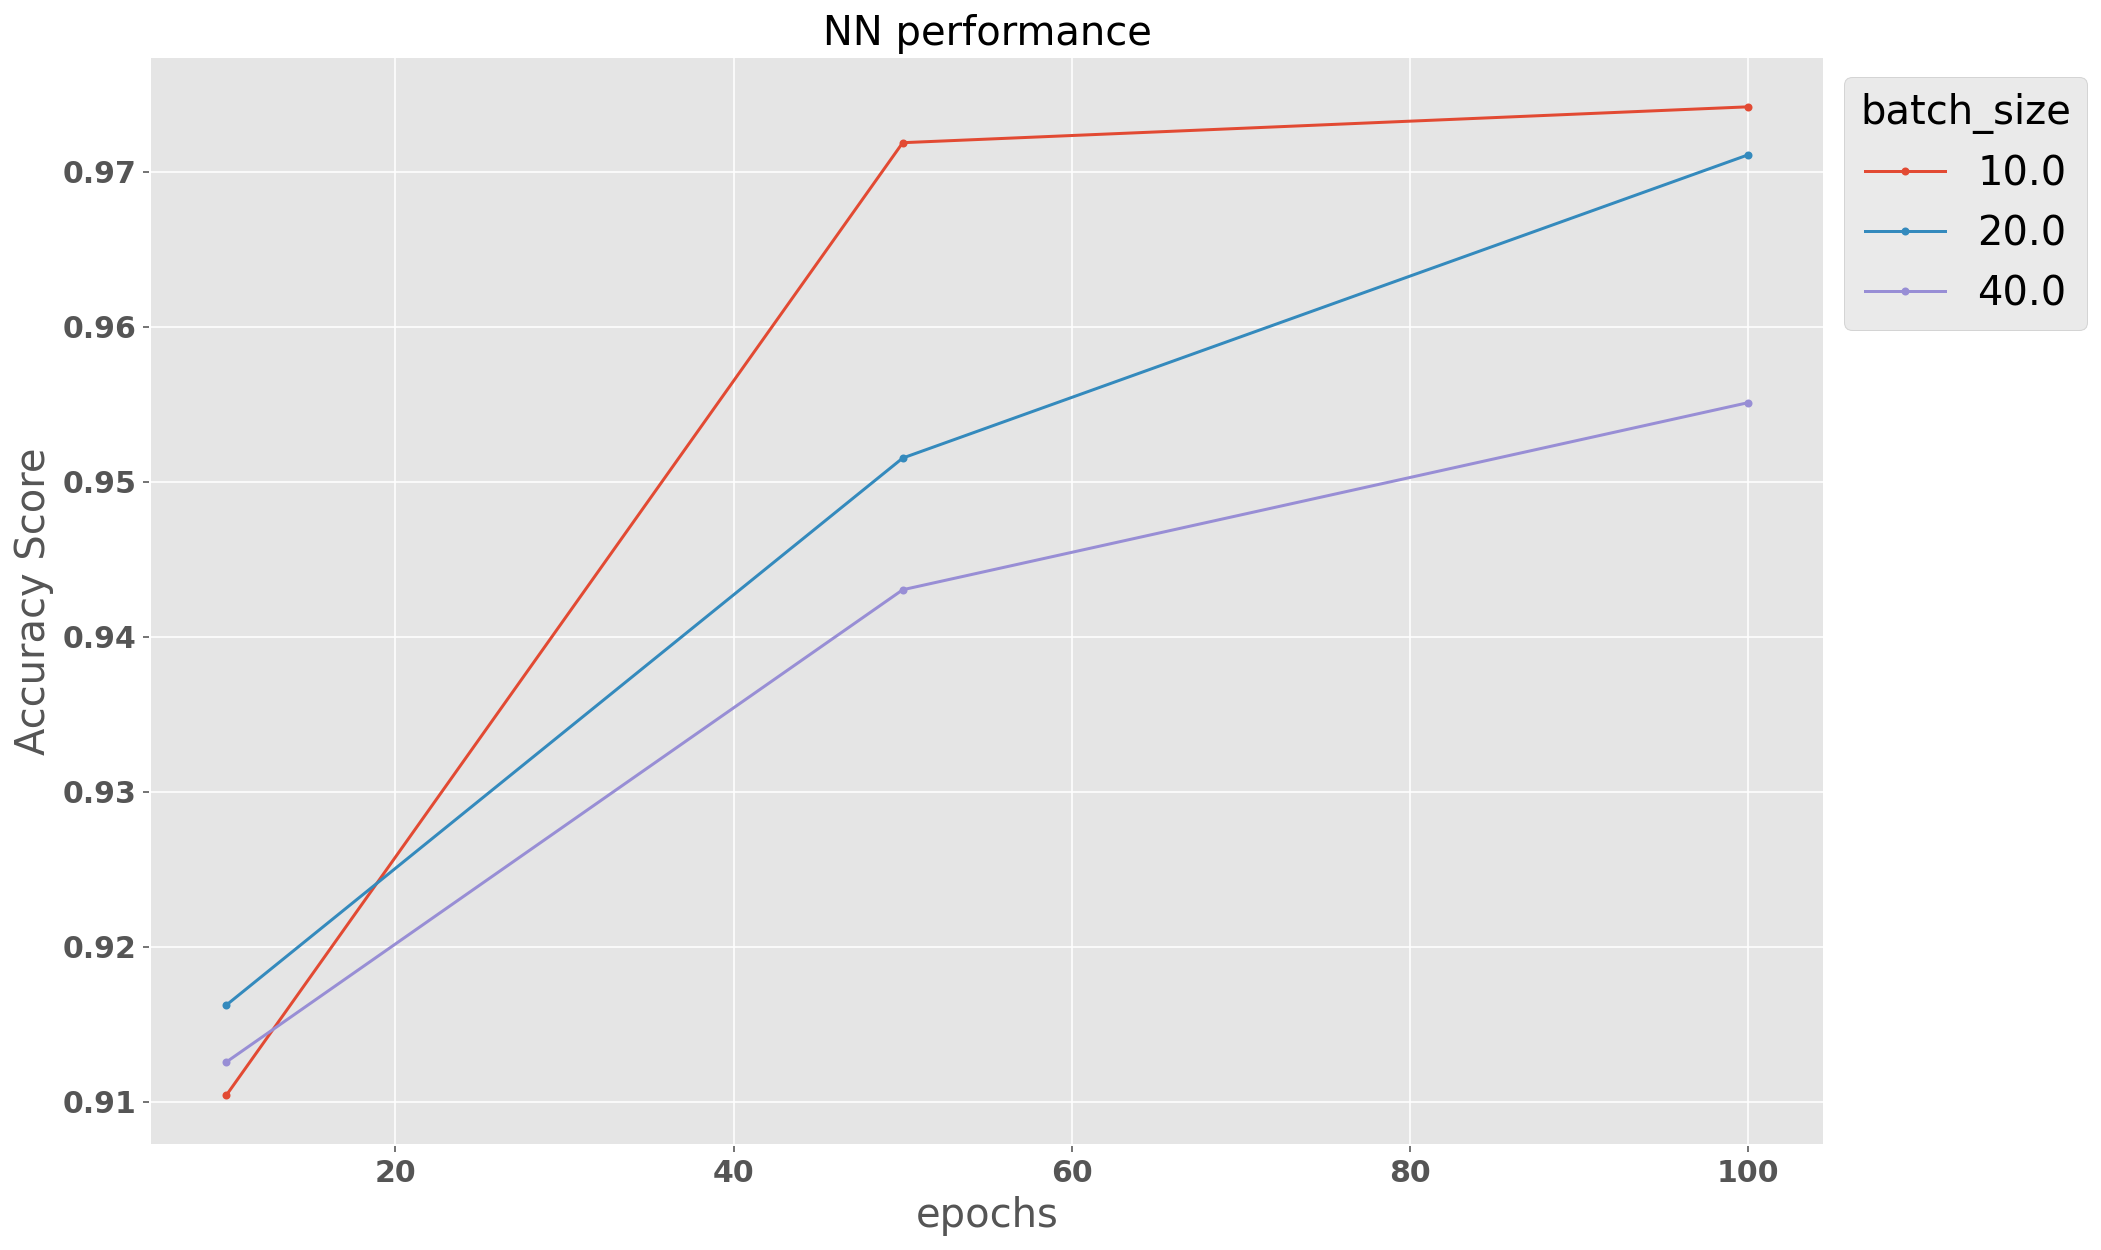

In [217]:
print(f'Best Params: {grid_result.best_params_}')
print(grid_result.best_params_["batch_size"])
print(f'Best Score: {grid_result.best_score_}')

results = get_search_results(grid_result)

plt.figure(figsize=(15,10)) # Setting the PLot size

for i in results['batch_size'].unique():
   
   temp = results[results['batch_size'] == i]
   lists = sorted(zip(*[temp['epochs'], temp['mean_score']]))
   new_x, new_y = list(zip(*lists))
   plt.plot(new_x, new_y, marker = '.', label = i)



plt.legend(title = 'batch_size', fontsize = 20, title_fontsize = 20, bbox_to_anchor=[1, 1])
plt.xlabel('epochs', fontsize = 20)
plt.ylabel("ROC-AUC Score", fontsize = 20)

plt.xticks( weight = 'bold', fontsize = 15)
plt.yticks( weight = 'bold', fontsize = 15)

plt.title("NN Performance", fontsize = 20)
plt.show()


**Step 2: Tuning Learning rate of SGD** 

In [215]:
from keras.layers import Dropout
def create_model(learning_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 24,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(layer1_dropout_rate))
    model.add(Dense(4,input_dim = 24,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(layer2_dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = SGD(lr=learning_rate, decay=decay, momentum=momentum)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)
learning_rate = [0.0001,0.001,0.01,0.1]
param_grids = dict(learning_rate = learning_rate)
np.random.seed(999)
# Define the grid search parameters
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = cv_method,
                           scoring='roc_auc',error_score='raise')
grid_result1 = grid.fit(d_train,t_train)

KeyboardInterrupt: 

In [218]:
print(f'Best Params: {grid_result1.best_params_}')
print(f'Best Score: {grid_result1.best_score_}')
results = get_search_results(grid_result1)


plt.figure(figsize=(15,10)) # Setting the PLot size

temp = results
lists = sorted(zip(*[temp['learning_rate'], temp['mean_score']]))
new_x, new_y = list(zip(*lists))
plt.plot(new_x, new_y, marker = '.', label = i)


plt.xlabel('learning_rate', fontsize = 20)
plt.ylabel("ROC-AUC Score", fontsize = 20)

plt.xticks( weight = 'bold', fontsize = 15)
plt.yticks( weight = 'bold', fontsize = 15)

plt.title("NN Performance", fontsize = 20)
plt.show()

NameError: name 'grid_result1' is not defined

**Step 3: Tuning dropout rate of dropout layers**

In [ ]:
from keras.layers import Dropout
def create_model(layer1_dropout_rate,layer2_dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 24,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(layer1_dropout_rate))
    model.add(Dense(4,input_dim = 24,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(layer2_dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = SGD(lr=0.1, decay=decay, momentum=momentum)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)
layer1_dropout_rate = [0.0,0.05,0.1,0.15,0.2]
layer2_dropout_rate = [0.0,0.05,0.1,0.15,0.2]
param_grids = dict(layer2_dropout_rate = layer2_dropout_rate ,layer1_dropout_rate=layer1_dropout_rate )
np.random.seed(999)
# Define the grid search parameters
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = cv_method,verbose = 10,
                           scoring='roc_auc',error_score='raise')
grid_result2 = grid.fit(d_train,t_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START layer1_dropout_rate=0.0, layer2_dropout_rate=0.0...........
[CV 1/5; 1/25] END layer1_dropout_rate=0.0, layer2_dropout_rate=0.0;, score=0.970 total time=  53.4s
[CV 2/5; 1/25] START layer1_dropout_rate=0.0, layer2_dropout_rate=0.0...........
[CV 2/5; 1/25] END layer1_dropout_rate=0.0, layer2_dropout_rate=0.0;, score=0.975 total time=  48.4s
[CV 3/5; 1/25] START layer1_dropout_rate=0.0, layer2_dropout_rate=0.0...........
[CV 3/5; 1/25] END layer1_dropout_rate=0.0, layer2_dropout_rate=0.0;, score=0.974 total time=  48.9s
[CV 4/5; 1/25] START layer1_dropout_rate=0.0, layer2_dropout_rate=0.0...........
[CV 4/5; 1/25] END layer1_dropout_rate=0.0, layer2_dropout_rate=0.0;, score=0.978 total time=  48.4s
[CV 5/5; 1/25] START layer1_dropout_rate=0.0, layer2_dropout_rate=0.0...........
[CV 5/5; 1/25] END layer1_dropout_rate=0.0, layer2_dropout_rate=0.0;, score=0.978 total time=  48.1s
[CV 1/5; 2/25] START layer1_

Best Params: {'layer1_dropout_rate': 0.05, 'layer2_dropout_rate': 0.0}
Best Score: 0.9728498671208419


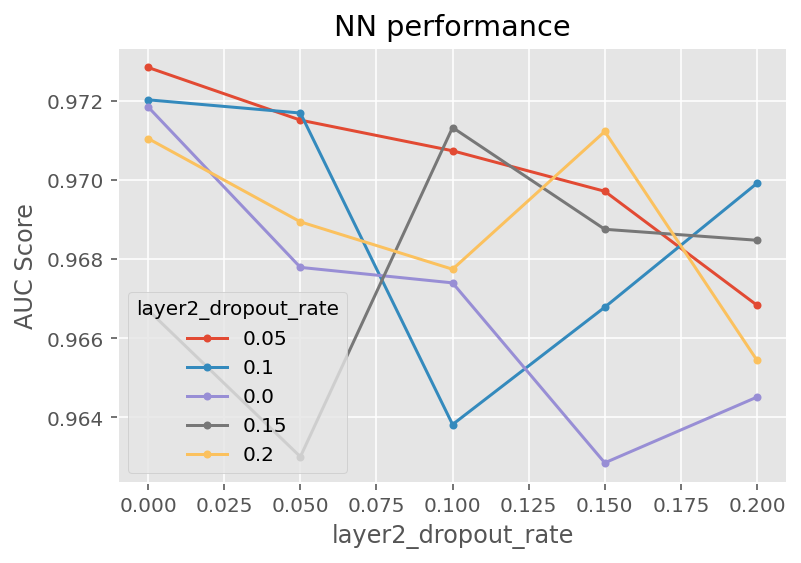

In [ ]:
print(f'Best Params: {grid_result2.best_params_}')
print(f'Best Score: {grid_result2.best_score_}')
results = get_search_results(grid_result2)

plt.figure(figsize=(15,10)) # Setting the PLot size

for i in results['layer1_dropout_rate'].unique():
   
   temp = results[results['layer1_dropout_rate'] == i]
   lists = sorted(zip(*[temp['layer2_dropout_rate'], temp['mean_score']]))
   new_x, new_y = list(zip(*lists))
   plt.plot(new_x, new_y, marker = '.', label = i)



plt.legend(title = 'layer2_dropout_rate', fontsize = 20, title_fontsize = 20, bbox_to_anchor=[1, 1])
plt.xlabel('layer2_dropout_rate', fontsize = 20)
plt.ylabel("ROC-AUC Score", fontsize = 20)

plt.xticks( weight = 'bold', fontsize = 15)
plt.yticks( weight = 'bold', fontsize = 15)

plt.title("NN Performance", fontsize = 20)
plt.show()

**Step 4: Tuning Number of Neurons in activation layer**

In [ ]:
def create_model(layer1_units,layer2_units):
    model = Sequential()
    model.add(Dense(layer1_units,input_dim = 24,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.05))
    model.add(Dense(layer2_units,input_dim = 24,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = SGD(lr=0.1, decay=decay, momentum=momentum)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)
layer1_units =[3,6,12,24,36]
layer2_units =[3,6,12,24]

param_grids = dict(layer1_units= layer1_units,layer2_units = layer2_units)
np.random.seed(999)
# Define the grid search parameters
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = cv_method,verbose = 10,
                           scoring='roc_auc',error_score='raise')
grid_result3 = grid.fit(d_train,t_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START layer1_units=3, layer2_units=3.............................
[CV 1/5; 1/20] END layer1_units=3, layer2_units=3;, score=0.968 total time=  52.0s
[CV 2/5; 1/20] START layer1_units=3, layer2_units=3.............................
[CV 2/5; 1/20] END layer1_units=3, layer2_units=3;, score=0.956 total time=  50.0s
[CV 3/5; 1/20] START layer1_units=3, layer2_units=3.............................
[CV 3/5; 1/20] END layer1_units=3, layer2_units=3;, score=0.500 total time=  49.8s
[CV 4/5; 1/20] START layer1_units=3, layer2_units=3.............................
[CV 4/5; 1/20] END layer1_units=3, layer2_units=3;, score=0.963 total time=  53.7s
[CV 5/5; 1/20] START layer1_units=3, layer2_units=3.............................
[CV 5/5; 1/20] END layer1_units=3, layer2_units=3;, score=0.955 total time=  51.6s
[CV 1/5; 2/20] START layer1_units=3, layer2_units=6.............................
[CV 1/5; 2/20] END layer1_units=3, la

Best Params: {'layer1_units': 24, 'layer2_units': 12}
Best Score: 0.9798040135265221


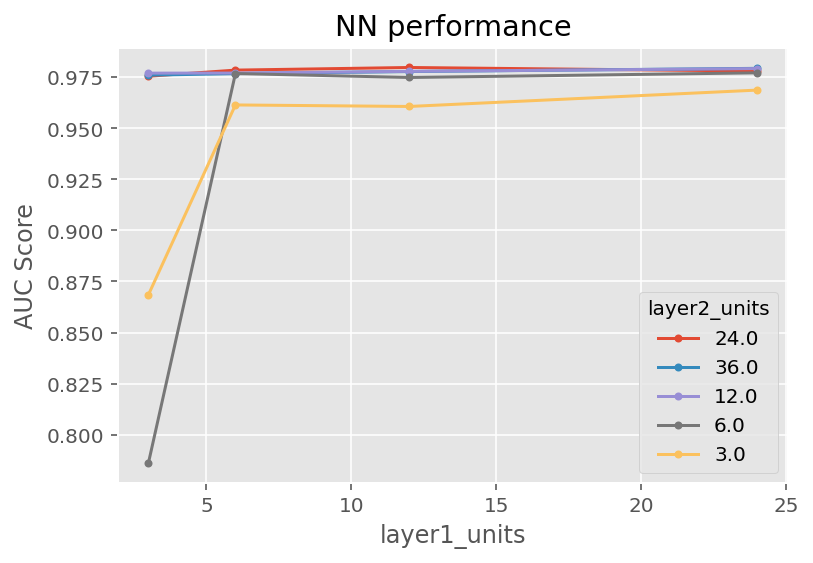

In [ ]:
print(f'Best Params: {grid_result3.best_params_}')
print(f'Best Score: {grid_result3.best_score_}')
results = get_search_results(grid_result3)

plt.figure(figsize=(15,10)) # Setting the PLot size

for i in results['layer1_units'].unique():
   
   temp = results[results['layer1_units'] == i]
   lists = sorted(zip(*[temp['layer2_units'], temp['mean_score']]))
   new_x, new_y = list(zip(*lists))
   plt.plot(new_x, new_y, marker = '.', label = i)



plt.legend(title = 'layer2_units')
plt.xlabel('layer1_units')
plt.ylabel("ROC-AUC Score", fontsize = 20)

plt.xticks( weight = 'bold', fontsize = 15)
plt.yticks( weight = 'bold', fontsize = 15)

plt.title("NN Performance", fontsize = 20)
plt.show()

**Step 5: Tuning Activation Function and Kernel Initializer**

In [ ]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(12,input_dim = 24,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.05))
    model.add(Dense(24,input_dim = 24,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = SGD(lr=0.1, decay=decay, momentum=momentum)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
param_grids = dict(activation_function = activation_function,init = init)
np.random.seed(999)
# Define the grid search parameters
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = cv_method,verbose = 10,
                           scoring='roc_auc',error_score='raise')
grid_result4 = grid.fit(d_train,t_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.965 total time=  56.2s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.959 total time= 1.0min
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.976 total time=  58.0s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.974 total time=  53.6s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.977 total time=  54.4s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

Best Params: {'activation_function': 'relu', 'init': 'uniform'}
Best Score: 0.9781502233850862


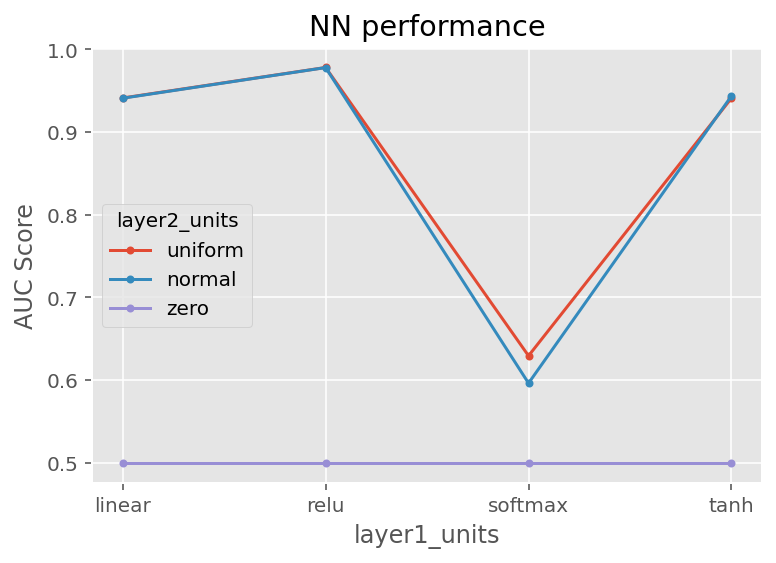

In [ ]:
print(f'Best Params: {grid_result4.best_params_}')
print(f'Best Score: {grid_result4.best_score_}')
results = get_search_results(grid_result4)

plt.figure(figsize=(15,10)) # Setting the PLot size

for i in results['init'].unique():
   
   temp = results[results['init'] == i]
   lists = sorted(zip(*[temp['activation_function'], temp['mean_score']]))
   new_x, new_y = list(zip(*lists))
   plt.plot(new_x, new_y, marker = '.', label = i)



plt.legend(title = 'Activation Function')
plt.xlabel('layer1_units')
plt.ylabel("ROC-AUC Score", fontsize = 20)

plt.xticks( weight = 'bold', fontsize = 15)
plt.yticks( weight = 'bold', fontsize = 15)

plt.title("NN Performance", fontsize = 20)
plt.show()

**FINAL MODEL**  
The final topology of our neural network contains: 
-	An input layer which consists of the 24 scaled descriptive features 
-	Hidden layer 1 which consists of 48 neurons and uses a rectified linear unit activation function 
-	Hidden layer 2 which consist of 24 neurons and an relu activation function 
-	2 dropout layers corresponding to each hidden layer with a dropout rate of 0.05 and 0.15 respectively 


In [219]:
from sklearn.metrics import classification_report, accuracy_score
# Optimum values 
activation_function = 'relu'
Kernal_init = 'normal'
epochs = 100
batch_size = 10
learning_rate = 0.1
layer1_dropout_rate= 0.05
layer2_dropout_rate= 0.0
layer1_units=  24
layer2_units= 12


def create_model():
    model = Sequential()
    model.add(Dense(layer1_units,input_dim = 24,kernel_initializer = Kernal_init,activation = activation_function))
    model.add(Dropout(layer1_dropout_rate))
    model.add(Dense(layer2_units,input_dim = 24,kernel_initializer =Kernal_init,activation = activation_function))
    model.add(Dropout(layer2_dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    opt = SGD(lr=learning_rate, decay=decay, momentum=momentum)
    model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = batch_size,epochs = epochs)
np.random.seed(999)
model.fit(d_train,t_train)
y_predict = model.predict(d_test)
nn_roc=roc_auc_score(t_test,y_predict)
print('Accuracy score:',accuracy_score(t_test,y_predict))
print('ROC-AUC score:',roc_auc_score(t_test,y_predict))
print(classification_report(t_test,y_predict))

KeyboardInterrupt: 

##### **Model Comparison** <a name="MC"></a>

#### Cross validation scores:
#####  KNN


In [220]:

from sklearn.model_selection import cross_val_score
d_test_final = d_test[:, np.r_[fs_indices_rfi[0:20]]]
cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=d_test_final,
                                 y=t_test, 
                                 cv=cv_method, 
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.9597328207415019

#####  NB

In [221]:
from sklearn.model_selection import cross_val_score
d_test_final = d_test[:, np.r_[fs_indices_rfi[0:24]]]
cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                 X=d_test_final,
                                 y=t_test, 
                                 cv=cv_method, 
                                 scoring='roc_auc')
cv_results_NB.mean()

0.9155659390986287

#####  DT

In [222]:
from sklearn.model_selection import cross_val_score
d_test_final = d_test[:, np.r_[fs_indices_rfi[0:5]]]
cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                 X=d_test_final,
                                 y=t_test, 
                                 cv=cv_method, 
                                 scoring='roc_auc')
cv_results_DT.mean()

0.9309974817948709

#####  LR

In [223]:
from sklearn.model_selection import cross_val_score
d_test_final = d_test[:, np.r_[fs_indices_rfi[0:24]]]
cv_results_LR = cross_val_score(estimator=gs_pipe_LR.best_estimator_,
                                 X=d_test_final,
                                 y=t_test, 
                                 cv=cv_method, 
                                 scoring='roc_auc')
cv_results_LR.mean()

0.936694006671632

#####  SVM

In [224]:
from sklearn.model_selection import cross_val_score
d_test_final = d_test[:, np.r_[fs_indices_rfi[0:20]]]
cv_results_SVM = cross_val_score(estimator=gs_pipe_SVM.best_estimator_,
                                 X=d_test_final,
                                 y=t_test, 
                                 cv=cv_method, 
                                 scoring='roc_auc')
cv_results_SVM.mean()

0.9680947126084674

#####  NN

In [225]:
from sklearn.model_selection import cross_val_score
cv_results_NN = cross_val_score(estimator=model,
                                 X=d_test,
                                 y=t_test, 
                                 cv=cv_method, 
                                 scoring='roc_auc')
cv_results_NN.mean()

KeyboardInterrupt: 

In [226]:
models = ['KNN','Naive Bayes','Decision Tree','Logistic regression','SVM','Neural Network']
AUC_Score = [cv_results_KNN.mean(),cv_results_NB.mean(),
cv_results_DT.mean(),cv_results_LR.mean(),cv_results_SVM.mean()
,cv_results_NN.mean()]

summary = pd.DataFrame({'Model': models, 

                        'AUC Score':AUC_Score})
summary

NameError: name 'cv_results_NN' is not defined

As the neural network achieved the highest AUC cross validation score , t-test will be used to determine if this is a statistically significant result

In [ ]:
from scipy import stats

tt=[]
tt.append(stats.ttest_rel(cv_results_NN, cv_results_KNN)[1])
tt.append(stats.ttest_rel(cv_results_NN, cv_results_NB)[1])
tt.append(stats.ttest_rel(cv_results_NN, cv_results_DT)[1])
tt.append(stats.ttest_rel(cv_results_NN, cv_results_LR)[1])
tt.append(stats.ttest_rel(cv_results_NN, cv_results_SVM)[1])


summary = pd.DataFrame({'Model': models[0:5], 

                        't-test p-value':tt})
summary

,Model,t-test p-value
0,KNN,0.326020
1,Naive Bayes,0.000347
2,Decision Tree,0.031863
3,Logistic regression,0.011832
4,SVM,0.907916


A seen above the null hypothesis can only be rejected in the cases in which the auc roc score of the nerual network was comapred with the Naive bayes , Decision tree and logistic regression models. Meaning , there is no statistically significant difference between the cross validation results of the Neural network model , SVM model and the KNN model. 

**Best models**: KNN , NN , SVM

# Critique & Limiations: <a name="CL"></a>

Although all our models performed relatively well on determining the satisfaction of airline passengers in general, this project and the subsequent models used do not come without limitations and faults. The limit placed upon the computation intensity of hyperparameter tuning, topology of the neural network used, and the overall amount of data used is likely to servery restrict the performance of our models. As seen in this report the neural network classifier progressively performed better after every parameter tuning step, meaning further fine tuning of the model with additional parameters and with more high-resolution parameter ranges would likely allow this model to outperform all others. Additionally, the size of the overall dataset was restitched to only 5000 samples, obviously a larger dataset would increase the accuracy and performance of all the models as it increases the learning capacity during the training process, specifically it would likely exponentially increase the neural networks performances as these algorithms are generally heavily reliant on large data inputs.
 
The method used for our feature selection process was the random forest feature importance algorithm which distinguishes importance’s based on the mean and standard deviation of impurity decrease within each tree. The main limitation of this approach is that it does not consider any co-dependence among features, which often leads to correlated features been given reduced importance and is often biased to numerical and high cardinality features like age, flight distance etc. This bias may explain the location of Age in the outputted feature importance list given its lack of relation to flight experience. 

The evaluation metric used for all our final classification models was AUC ROC which is the area under the receiver operations characteristics curve that gives us the trade-off between true positive and false positive rate. Although this metric is relatively robust for our binary classification problem its important to note this metric does not work well with highly unbalanced data, especially towards negative values. As our data is slightly unbalanced towards the positive target values this may introduce uncertainty. F1 score and precision-recall curve could also be used for this problem type, however AUC ROC was ultimately chosen as it is optimal for the improvement of both positive and negative classes. 




# Summary & conclusion: <a name="sum"></a>

##  Poject Summary: <a name="Prosum"></a>


Due to the competitive nature of the airline industry and the overall effect customer satisfaction has on customer retention in said industry, the competitive advantage that data such as that from a customer survey to adequately predict satisfaction provides is immeasurable. 
In phase 1, after the data was obtained from Kaggle [US Airline Passenger Satisfaction](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction) The data was pre-processed by first checking for outliers , missing values , redundant information and any incorrect datatypes , all of which were imputed as they constituted less than 5% of the overall dataset and therefore can be removed with effecting the overarching trends in the data. 5000 rows were then sampled form the overall dataset to reduce the computational intensity of our modelling process that the 100000+ rows would otherwise produce. 
We then explored the data through visualisations to identify any obvious trends and relationships. This was achieved by graphing 4 of each one-variable, two-variable and three variable plots. These include:
-   Histogram of flight distance variable
-   Bar chart of Satisfaction frequency 
-   Histogram of passenger age group
-   Bar chart of travel type
-   Box Plot of flight distance by satisfaction
-   Bar chart of satisfaction by class
-   Stacked Bar-Chart of Satisfaction by Customer type
-   Box plot of age by ease of online booking
-   Faceted bar plot of seat comfort effect on satisfaction across class
-   Side-by-side boxplots of Flight Distance by Satisfaction and Age group
-   Faceted bar plot of leg room service by seat comfort and satisfaction
-    Side by side Boxplots of onboard service by age

The main features observed in our data were:
-	A data is unbalanced towards the positive target variable (satisfied customers)
-	Loyalty observed a strong positive relationship with satisfaction 
-	Age and flight distance do not have a strong direct relationship with satisfaction 
-	More business class passengers were satisfied than economy class passengers 

In phase 2 of this project, we focused on training and evaluating a set of machine learning models to predict the satisfaction levels of customs (binary: satisfied or not) based on the 24 descriptive features in the dataset. Again, data pre-processing was used on the sample data outputted from phase 1 of this project. This including One-hot encoding of the all the categorical features to increase the ease of model training and Min-max scaling of the numerical features to reduce the overall effect that outliers have on our systems. Feature selection is then performed to get the order of features from most important to least important to determining satisfaction using the random forest importance. Six supervised machine learning algorithms were then trained. For each of the algorithms, pipelines were used to stack the feature selection and hyperparameter tuning. In all cases, AUC ROC is used as the performance metric in the grid searches to identify optimal parameters and features to be used to achieve the best model. The performance of different features and parameters is also visualised on a line graph to see what affect the different parameters have on the AUC ROC scores. 
The classifiers used for this report are:
1. K-nearest neighbours 
2. Decision trees
3. Gaussian naive bayes
4. logistic regression
5. Support vector machines
6. Neural network

To reduce the computational load of the neural network’s hyperparameter tuning, it was separated into 5 individual steps in which parameters were progressively tuned using a grid search on the training data. The parameters that were chosen to be tuned were: 
-	Activation Functions
-	Kernel Initializers 
-	No. of neurons 
-	Dropout rates 
-	Learning rate of optimizer 
-	Batch size 
-	Epochs

The performance of the models was then compared to see which one performed best for this binary classification problem. First the mean of all the models cross validation results were calculated and they were compared across all the models. As the neural network got the best average AUC ROC score, t test is performed with the neural network against all the other models to see if there is a statistically significant difference between that and the other model performance. Therefore, the best models will be neural network and any other model where there is a statistically insignificant difference between there AUC ROC scores.



##  Summary of Findings: <a name="Fsum"></a>

The top 5 features by importance were found to be in the following order: 
-	Inflight Entertainment
-	Ease of Online Booking
-	Seat Comfort
-	Online Support
-	Leg Room Service

The top 5 least important features by importance were found to be with Economy plus class the least important factor:
- Inflight Wifi Service
- Arrival Delay in Minutes
- Departure Delay in Minutes
- Economy class
- Economy Plus class

The best features and parameters for the KNN algorithm are:
-	First 20 most important features
-	N_neighbours = 10
-	P = 1

The best features and parameters for the NB algorithm are:
-	First 24 most important features
-	Var_smoothing = 0.10234

The best features and parameters for the Decision Tree algorithm are:
-	First 5 most important features
-	Criterion = ‘gini’
-	Max_depth = 10
-	Min_samples_split = 10

The best features and parameters for the logistic regression algorithm are:
-	First 24 most important features
-	C = 1
-	Penalty = 12
-	Solver = newton-cg

The best features and parameters for the SVM algorithm are:
-	First 20 important features
-	C = 100
-	Gamma = 0.1
-	Kernel = poly

The best features and parameters for the NN algorithm are:
-	First 24 important features
-	activation function = 'relu'
-	Kernal_init = 'normal'
-	epochs = 100
-	batch_size = 10
-	learning_rate = 0.1
-	layer1_dropout_rate= 0.05
-	layer2_dropout_rate= 0.0
-	layer1_units=  24
-	layer2_units= 12

Final Model cross validation scores are:
-	0.961 for KNN
-	0.915 for NB
-	0.931 for DT
-	0.965 for SVM
-	0.966 for NN

NN was used in all t test pairs as it had the best performing score. It was found that there was a statistically insignificant t test score between NN and KNN, and NN and SVM, therefore NN, KNN and SVM are the best algorithms to use for this problem.

##  Conclusions: <a name="conc"></a>

In conclusion, we found the 5 most imporatnt features for predicting whether a customer will be satisfied are Inflight Entertainment, Ease of Online Booking, Seat Comfort, Online Support and Leg Room Service. Therefore these are the main features the airlines should invest in in order to ensure satisfied customers and hence ensure their customers stay loyal. Conversely airlines can choose to invest less in the following  aspects of its buisness because these were shown to have the least impact on customer satisfaction. These are, Departure/Arrival Time Convenient, Type of Travel, Gate Location, Inflight Wifi Service, Arrival Delay in Minutes and Departure Delay in Minutes. Finally it was found the most accurate algorithms used to predict whether a customer is satisfied or not is the KNN model, the Neural Network Model and the SVM model, whose input features and optimal parameters can be seen in the summary of findings above.

<span style='font-family:"Times New Roman"'> 

### References: <a name="ref"></a>
<span styel=''>

In [ ]:
"https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2656082/" # Discretization    

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2656082/'